![](https://images.aicrowd.com/raw_images/challenges/banner_file/1023/a8ebe297c369ea4a7697.png)

<h2><center>Starter Code for Sentiment Classification</center></h2>


In this baseline we will be training an sklearn model to do a multi-class classificattion of sentiment from face embeddings. 

## Downloading Dataset

Installing puzzle datasets via `aicrowd-cli`

In [2]:
# !pip install aicrowd-cli

# Make sure to re-run below code whenever you restart colab notebook
#%load_ext aicrowd.magic

In [3]:
# # Logging in from our AIcrowd account. Make sure you have accepted the puzzle rules before logging in!  

#%aicrowd login

In [4]:
# # Creating a new data directory and downloading the dataset 

# !rm -rf data
# !mkdir data
# %aicrowd ds dl -c sentiment-classification -o data

## Importing Libraries

In this baseline, we will be sing sklearn [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to classify the sentiment of face embeddings. 

In [5]:
import pandas as pd
import os
import numpy as np
from ast import literal_eval
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

random.seed(42)

## Reading Dataset

As mented in the challenge readme, we have three different sets provided - train, validation and test respectively.  

In [6]:
# Readging the csv 

train = pd.read_csv("data/train.csv")
val = pd.read_csv("data/val.csv")
submission = pd.read_csv("data/sample_submission.csv")

train

embeddings     label
0     [0.3206779360771179, 0.988215982913971, 1.0441...  positive
1     [0.05074610561132431, 1.0742985010147095, 0.60...  negative
2     [0.41962647438049316, 0.4505457878112793, 1.39...  negative
3     [0.4361684024333954, 0.19191382825374603, 0.83...  positive
4     [0.6382085084915161, 0.8352395296096802, 0.393...   neutral
...                                                 ...       ...
4995  [2.2057647705078125, 1.1072001457214355, 0.435...   neutral
4996  [0.6344252228736877, 1.164398193359375, 0.7155...  negative
4997  [0.9160683155059814, 0.39996421337127686, 0.82...  negative
4998  [0.006456990726292133, 0.18667978048324585, 0....  positive
4999  [1.337027668952942, 0.8853631615638733, 0.6706...  negative

[5000 rows x 2 columns]

In [7]:
# Getting the feature and labels from each set. 


X = np.array([literal_eval(embedding)  for embedding in train['embeddings'].values])
y = np.array(train['label'].values)

X_val = np.array([literal_eval(embedding)  for embedding in val['embeddings'].values])
y_val = np.array(val['label'].values)

In [8]:
X.shape, y.shape, X_val.shape, y.shape

((5000, 512), (5000,), (2000, 512), (5000,))

In [9]:
import matplotlib.pyplot as plt

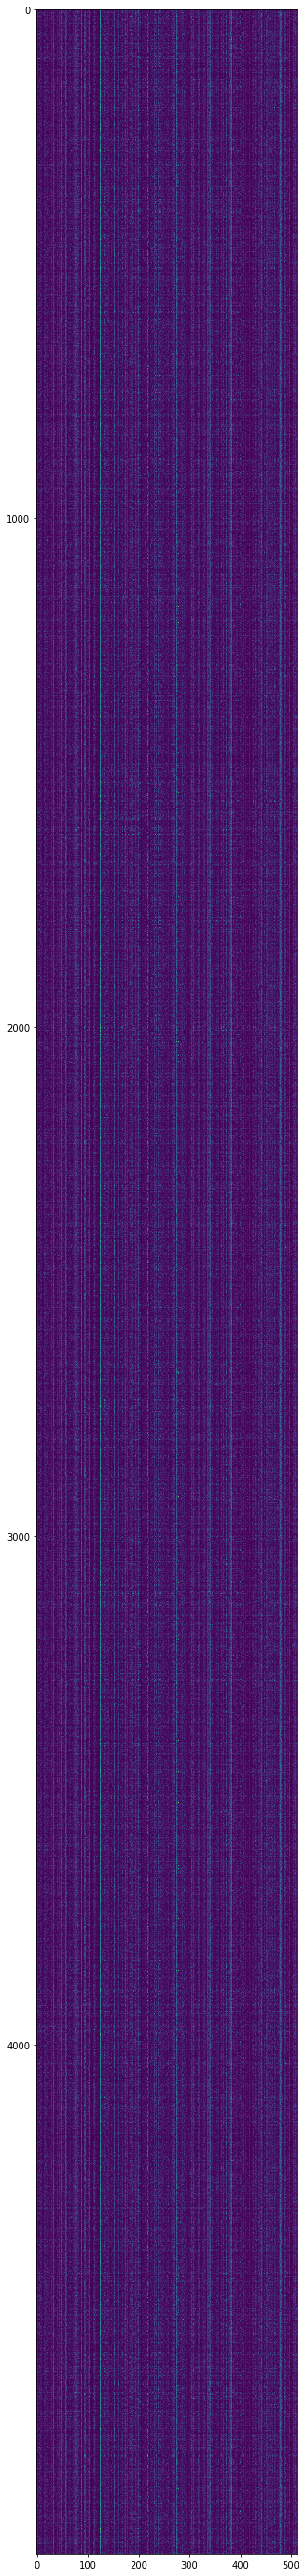

In [10]:
plt.figure(figsize=(5,100))
plt.imshow(X)

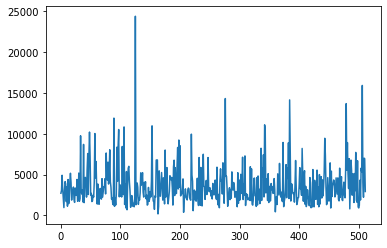

In [11]:
plt.plot(np.sum(X,axis=0));

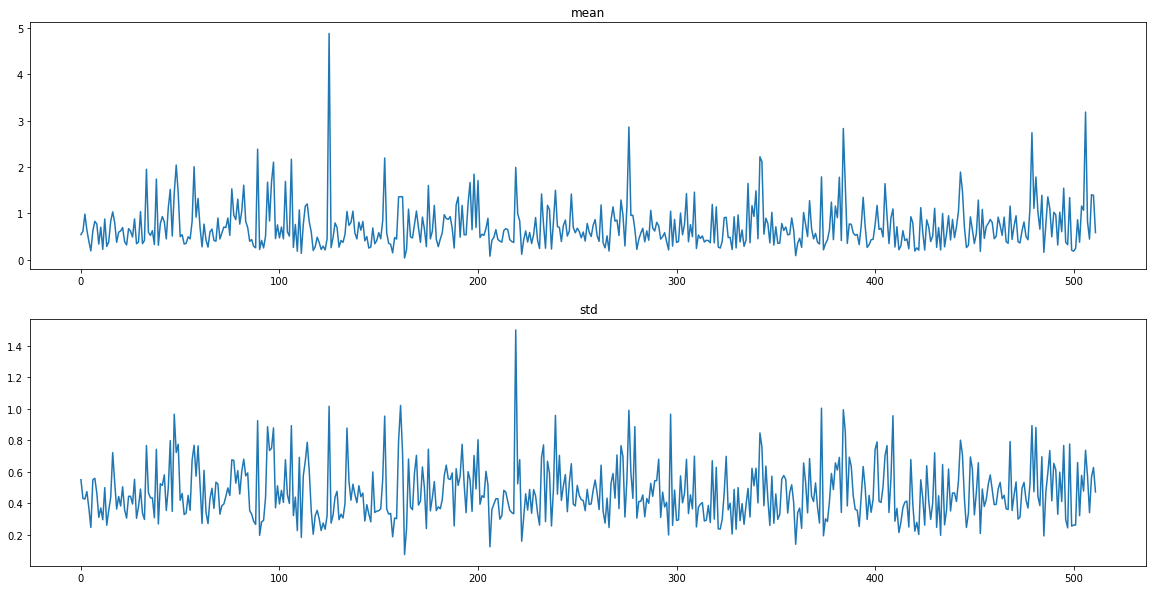

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.title('mean')
plt.plot(np.mean(X,axis=0))
plt.subplot(2,1,2)
plt.title('std')
plt.plot(np.std(X,axis=0))

In [13]:
mean = np.mean(X,axis=0)
std = np.std(X,axis=0)

XX = (X-mean)/std

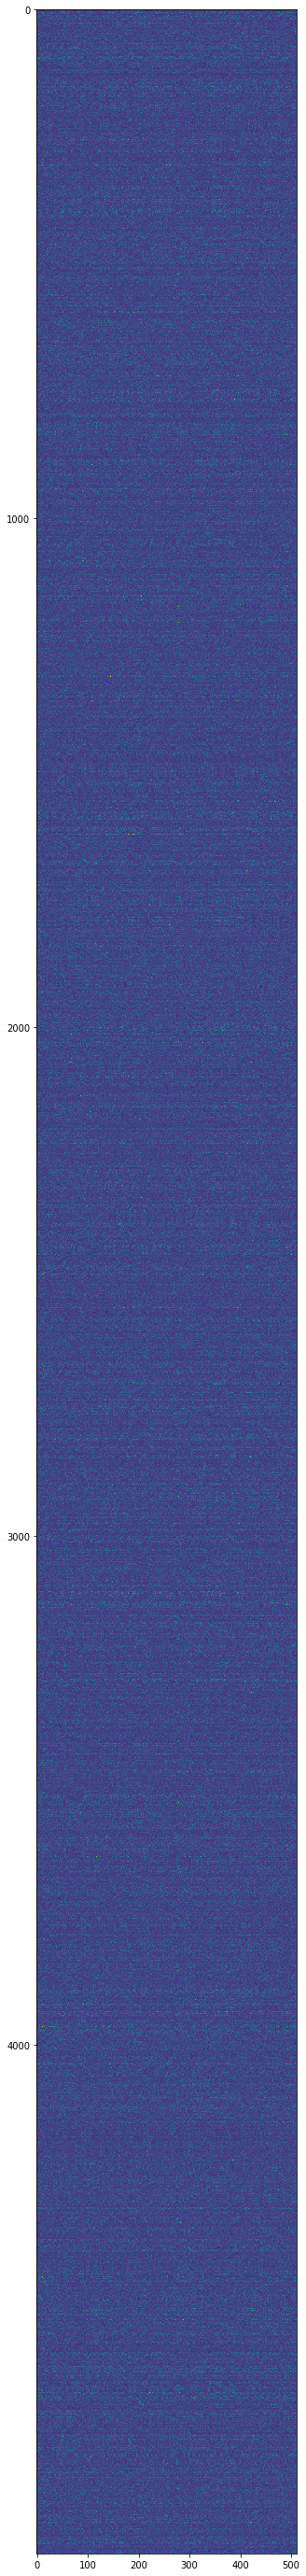

In [14]:
plt.figure(figsize=(5,100))
plt.imshow(XX)

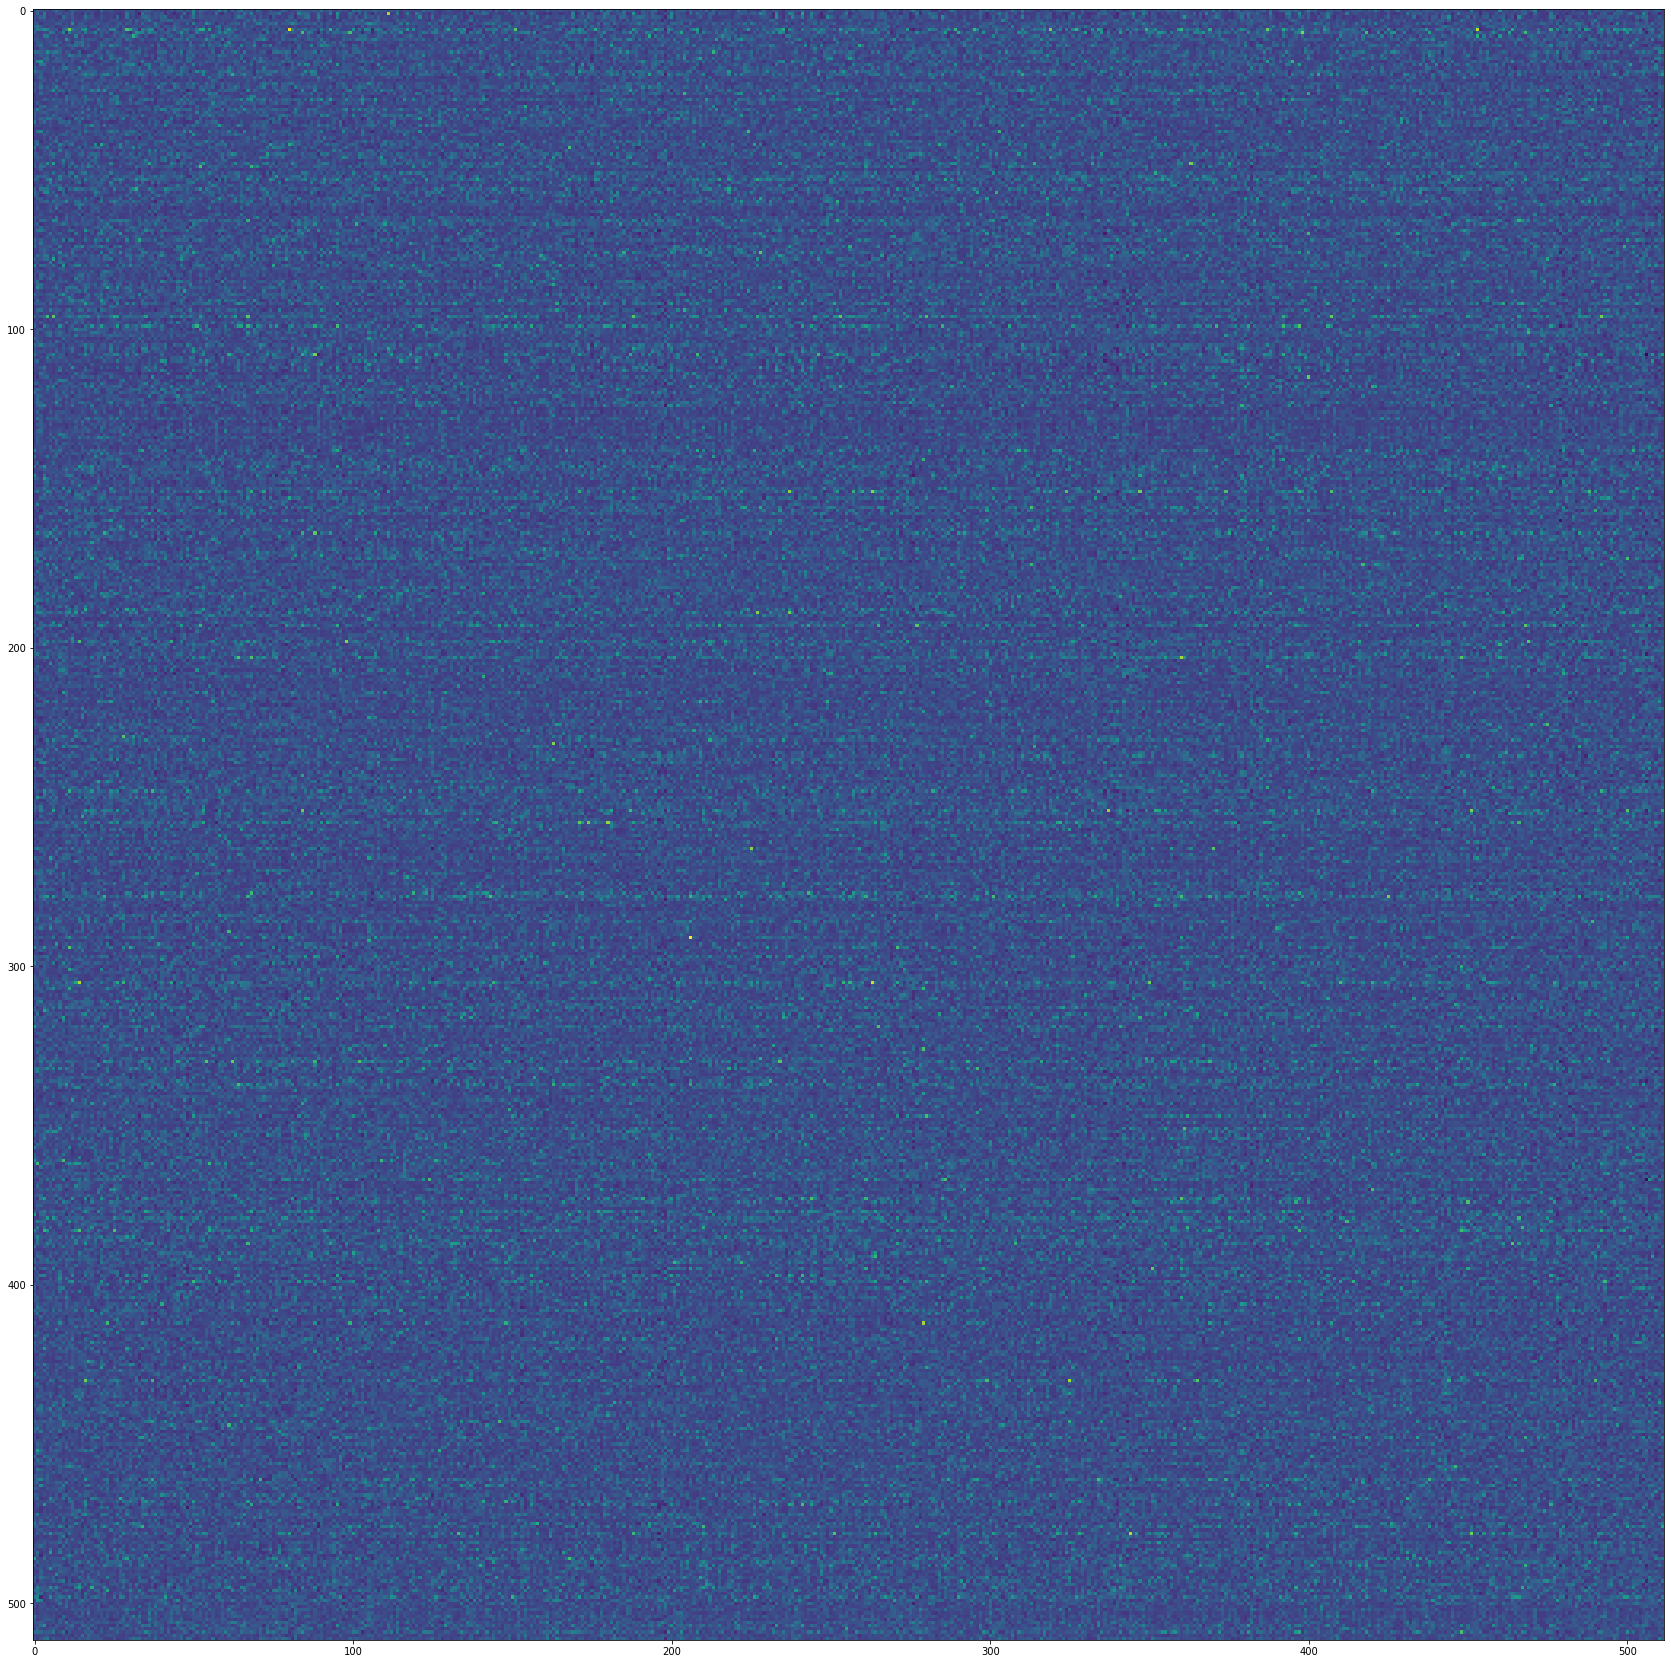

In [15]:
plt.figure(figsize=(30,30))
plt.imshow(XX[:512,:])

In [16]:
!pip install umap-learn --user

In [17]:
import umap
import seaborn as sns


In [18]:
umap_results = umap.UMAP().fit_transform(XX)

C:\Users\karol\AppData\Roaming\Python\Python37\site-packages\numba\np\ufunc\parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11100. The TBB threading layer is disabled.
  warnings.warn(problem)


Text(0.5, 1.0, 'XX')

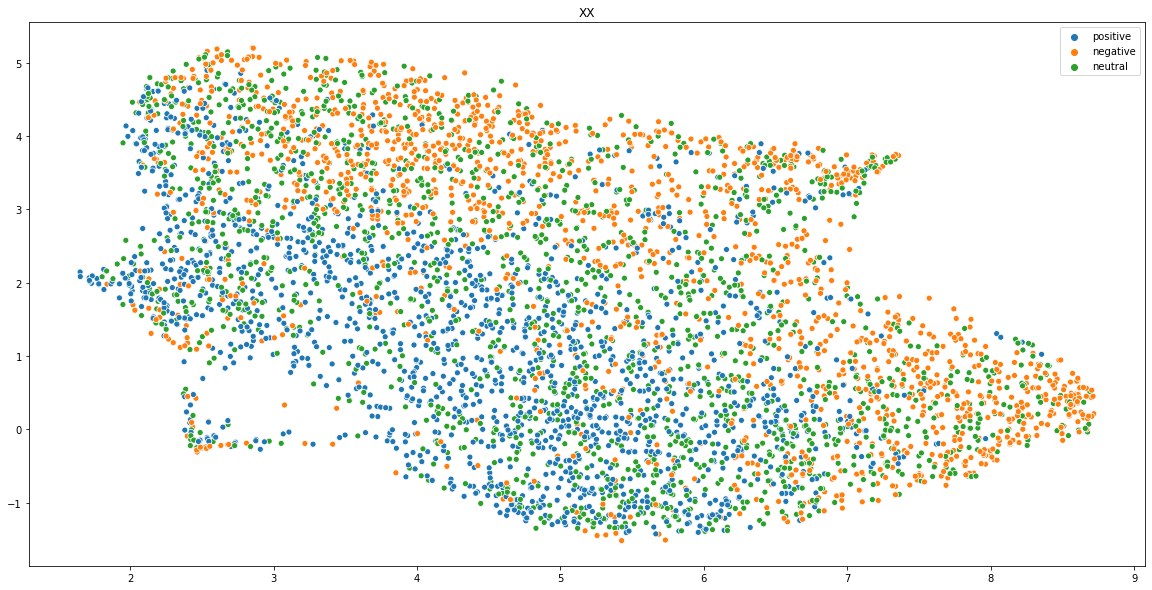

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], hue=y, palette=sns.color_palette()[:3])
plt.title('XX')

Text(0.5, 1.0, 'normalized X')

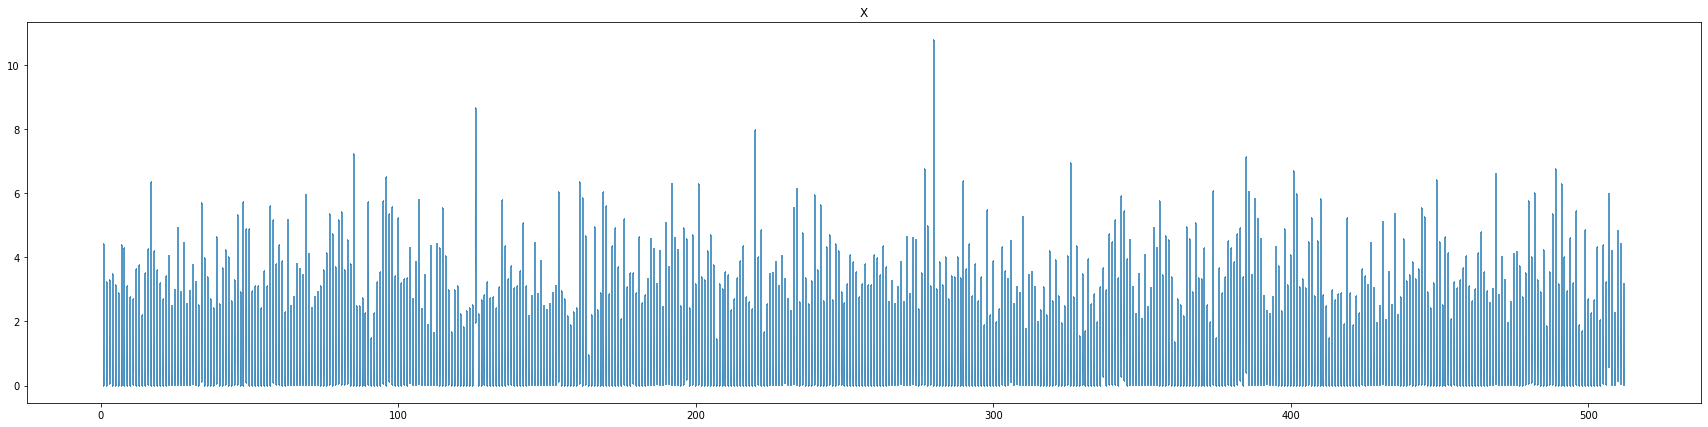

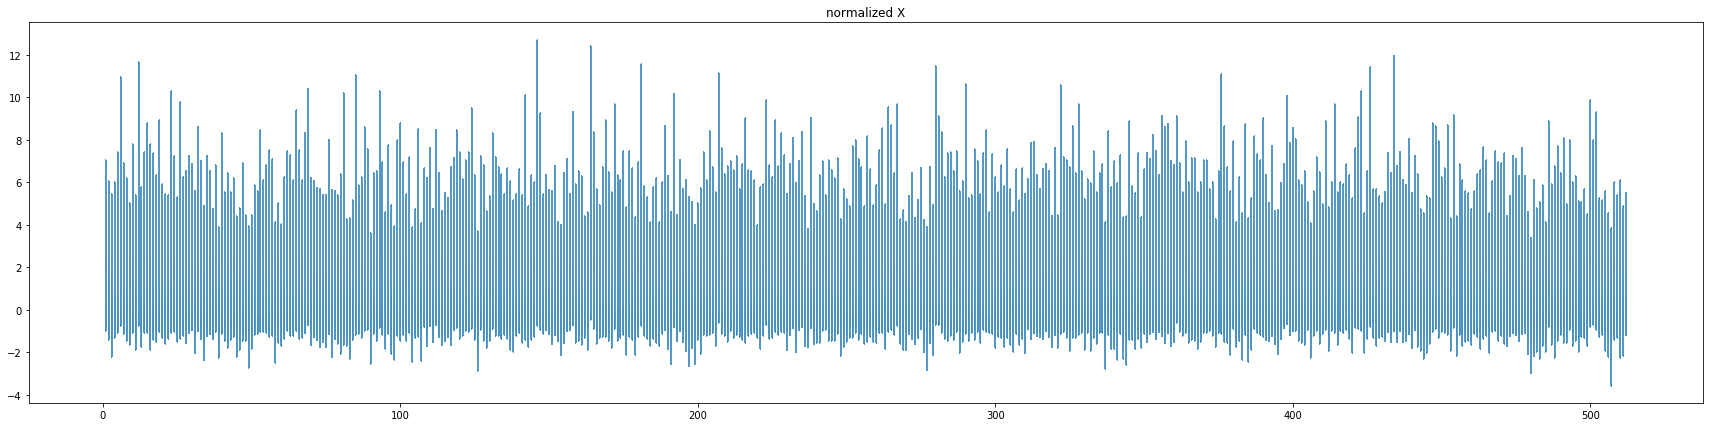

In [20]:
plt.figure(figsize=(30,7))
plt.violinplot(X[:,:]);
plt.title('X')
plt.figure(figsize=(30,7))
plt.violinplot(XX[:,:]);
plt.title('normalized X')

In [21]:
# !pip install shap xgboost

In [22]:
y[y=='positive']=2
y[y=='negative']=0
y[y=='neutral']=1

y_val[y_val=='positive']=2
y_val[y_val=='negative']=0
y_val[y_val=='neutral']=1

In [23]:
original_y = y.copy()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


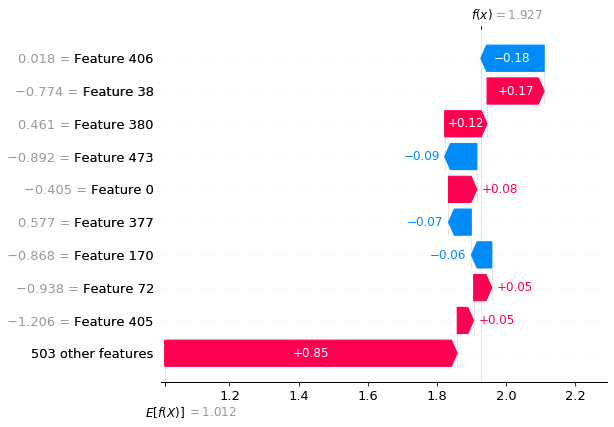

In [24]:
import xgboost
import shap

model = xgboost.XGBRegressor().fit(XX, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(XX)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

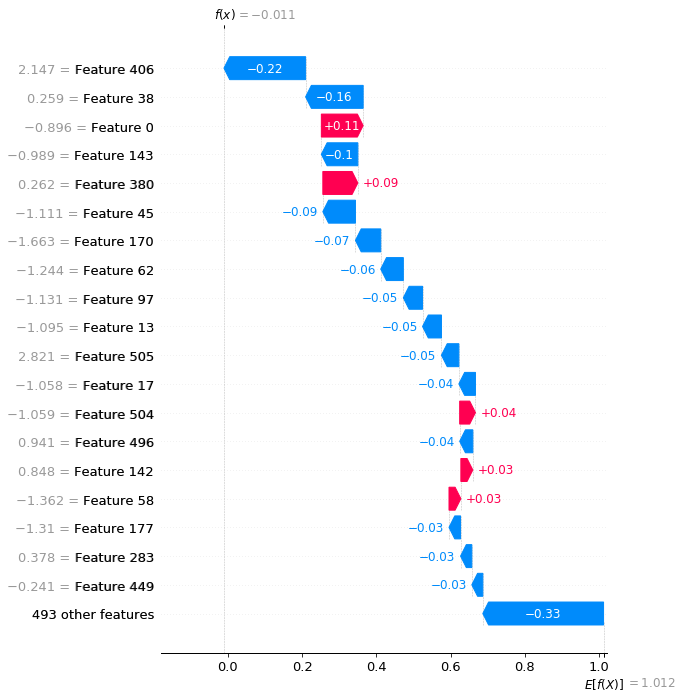

In [25]:
shap.plots.waterfall(shap_values[1], max_display=20)

In [26]:
shap_values.shape

(5000, 512)

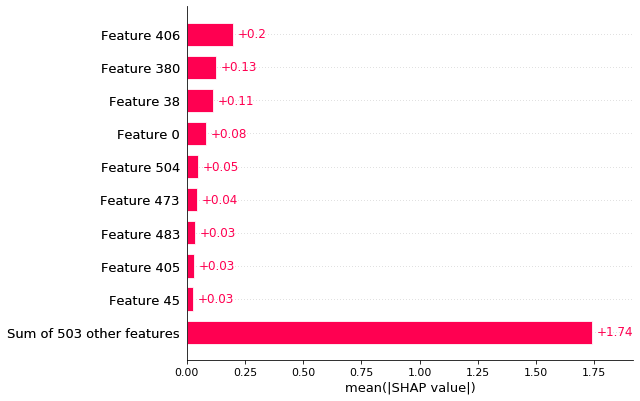

In [27]:
shap.plots.bar(shap_values)

In [28]:
cor = np.corrcoef(X.transpose())
cor.shape

(512, 512)

In [29]:
XX.shape

(5000, 512)

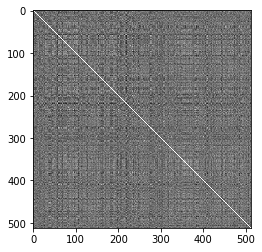

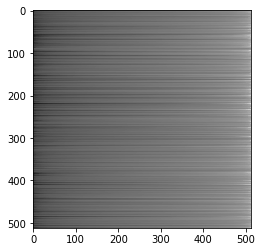

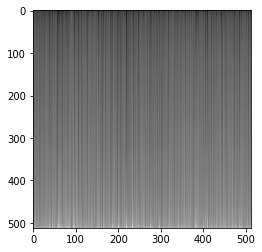

In [30]:
cor = np.corrcoef(X.transpose())

plt.figure()
plt.imshow(cor,cmap='gray')
plt.figure()#figsize=(20,20))
plt.imshow(np.sort(cor,axis=1),cmap='gray')

plt.figure()#figsize=(20,20))
plt.imshow(np.sort(cor,axis=0),cmap='gray')

In [31]:
y.dtype,y.shape, y[:10].astype(np.uint8)

(dtype('O'), (5000,), array([2, 0, 0, 2, 1, 0, 0, 0, 2, 0], dtype=uint8))

In [32]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, f_regression

kbest = SelectKBest(f_regression, k=20)

X_new = kbest.fit_transform(X, original_y.astype(np.uint8))
X_val_new = kbest.transform(X_val)
X_new.shape, X_val_new.shape

((5000, 20), (2000, 20))

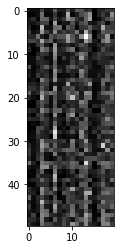

In [33]:

plt.figure()
plt.imshow(X_new[:50],cmap='gray')

(5000, 16)

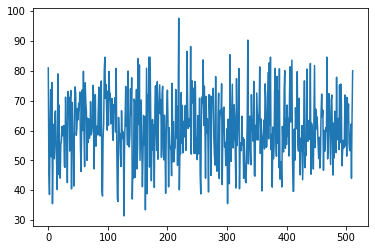

In [34]:
s = np.sum(np.abs(cor),axis=1)
plt.plot(s)

A = XX[:,s<40]
A.shape

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


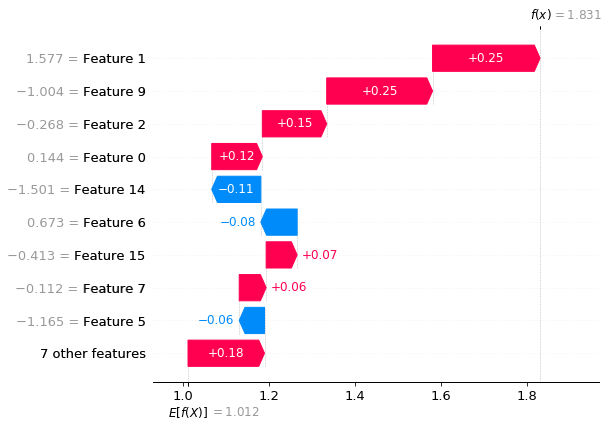

In [35]:
model = xgboost.XGBRegressor().fit(A, y)

explainer = shap.Explainer(model)
shap_values = explainer(A)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

NameError: name 'submission_embeddings' is not defined

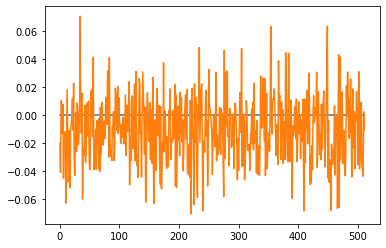

In [36]:
# plt.plot(XX.mean(axis=0),label='train')
# plt.plot(((X_val-mean)/std).mean(axis=0),label='val')
# plt.plot(((np.array(submission_embeddings)-mean)/std).mean(axis=0),label='test');
# plt.legend()

In [ ]:
# plt.plot(XX.std(axis=0),label='train')
# plt.plot(((X_val-mean)/std).std(axis=0),label='val')
# plt.plot(((np.array(submission_embeddings)-mean)/std).std(axis=0),label='test');
# plt.legend()

In [ ]:
# y_pred = model.predict(((np.array(submission_embeddings)-mean)/std)[:,s<40]+0.5).astype(np.uint8)
# print(y_pred,y_pred.min(),y_pred.max())

In [41]:
# plt.violinplot(y_pred)

In [43]:
# def convert(a):
#     if a==0:
#         return 'negative'
#     if a==1:
#         return 'neutral'
#     if a==2:
#         return 'positive'

# result = list(map(convert, y_pred))

In [ ]:
# np.unique(result, return_counts=True)

In [ ]:
# submission['label'] = result
# submission

In [44]:
# len(result)

## Training the model

Here, we will be training our model using the training set. 

In [45]:
# model = RandomForestClassifier()
# model

In [46]:
# model.fit(X, y)

### Testing the Model

Here, we will be evaluator our model using validation set 

In [47]:
# y_pred = model.predict(X_val)

# print(f"F1 Score : {f1_score(y_val, y_pred, average='weighted')}")
# print(f"Accuracy Score : {accuracy_score(y_val, y_pred)}")

# TF Keras

In [48]:
import tensorflow as tf

In [49]:
from datetime import datetime

In [50]:
import optuna
from optuna.trial import TrialState
from optuna.integration import TFKerasPruningCallback, TensorBoardCallback


In [51]:

y = tf.one_hot(y,3)
y[:10]

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

In [52]:
np.unique(y,return_counts=True)

(array([0., 1.], dtype=float32), array([10000,  5000], dtype=int64))

In [53]:

y_val = tf.one_hot(y_val,3)
y_val[:10]

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)>

In [54]:
# y=y.astype(np.float32)
# y_val=y_val.astype(np.float32)

In [55]:

# def getModelOld(neurons0=1024,neurons1=1024,neurons2=1024, layers1=3, layers2=3,
#              dropout=0.5, lr=3e-3, ln=0, noise=1, num_heads=8, num_atts=1):
#     x = tf.keras.layers.InputLayer(input_shape=(512,))
    
#     ls=[]
#     for _ in range(num_atts):
#         ls.append(tf.keras.layers.MultiHeadAttention(num_heads, key_dim=1, dropout=dropout))
    
    
#     ls.append(tf.keras.layers.Dense(neurons0, activation='relu'))
    
#     if noise>0:
#         ls.append(tf.keras.layers.GaussianNoise(0.1))
    
#     if ln>0:
#         ls.append(tf.keras.layers.LayerNormalization())
        
#     for _ in range(layers1):
#         ls.append(tf.keras.layers.Dense(neurons1, activation='relu'),)
#     for _ in range(layers2):
#         ls.append(tf.keras.layers.Dense(neurons2, activation='relu'),)
#     if ln>1:
#         ls.append(tf.keras.layers.LayerNormalization())
#     ls.append(tf.keras.layers.Dropout(dropout))
#     ls.append(tf.keras.layers.Dense(3, activation='softmax'))
#     model = tf.keras.models.Sequential(ls)
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
#                   loss='categorical_crossentropy',
#                   metrics=['mae','mse','accuracy',my_f1,my_acc],
#                   run_eagerly=True)
#     return model

# # def getModelCls():
# #     model = tf.keras.models.Sequential([tf.keras.layers.Dense(1024, activation='relu', input_shape=(512,)),
# # #                                         tf.keras.layers.Dropout(0.25),
# #                                         tf.keras.layers.LayerNormalization(),
# #                                         tf.keras.layers.Dense(1024, activation='relu'),
# #                                         tf.keras.layers.Dense(1024, activation='relu'),
# #                                         tf.keras.layers.Dropout(0.5),
# #                                         tf.keras.layers.Dense(1024, activation='relu'),
# #                                         tf.keras.layers.LayerNormalization(),
# #                                         tf.keras.layers.Dropout(0.5),
# #                                         tf.keras.layers.Dense(3, activation='softmax')])
# #     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
# #                   loss='categorical_crossentropy',
# #                   metrics=['mae','mse','accuracy',my_f1,my_acc],
# #                   run_eagerly=True)
# #     return model
# # model = getModelCls()
# # model.summary()

# # model.fit(X/10.0,y,
# #           validation_data=(X_val/10.0,y_val),
# #           batch_size=1024,
# #           epochs=500,
# #           verbose=0,
# #          callbacks=[tf.keras.callbacks.TensorBoard(
# #     log_dir="logs/0/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
# #     histogram_freq=1,
# #     write_graph=True,
# #     update_freq="epoch"),#PlotLossesKerasTF(),
# # #                    tf.keras.callbacks.ModelCheckpoint(
# # #     'checkpoint',
# # #     monitor="val_my_f1",
# # #     verbose=1,
# # #     save_best_only=True,
# # #     save_weights_only=False,
# # #     mode="max",
# # #     save_freq="epoch",),
# #                     tf.keras.callbacks.EarlyStopping(
# #                                     monitor="val_my_f1",
# #                                     patience=100,
# #                                     verbose=1,
# #                                     mode="max",
# #                                     restore_best_weights=True,
# #                                 ),
# #                    tf.keras.callbacks.ReduceLROnPlateau(
# #     monitor="val_my_f1",
# #     factor=0.3,
# #     patience=10,
# #     verbose=1,
# #     mode="max",
# #     min_delta=0.0001,
# #     cooldown=0,
# #     min_lr=1e-10,
# # )])

In [56]:
import tensorflow_addons as tfa


Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.4.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons


In [57]:
y

<tf.Tensor: shape=(5000, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

In [58]:
def my_f1(y_val, y_pred, sample_weight=None):
    return f1_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1),average='weighted')

def my_acc(y_val, y_pred, sample_weight=None):
    return accuracy_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1))

def getModel(neurons0=1024,neurons1=1024,neurons2=1024, layers1=3, layers2=3,
             dropout=0.5, lr=3e-3, ln=0, noise=1, num_heads=8, input_shape=512):
    
    xx = tf.keras.Input(shape=(input_shape,))
    if num_heads>0:
        x=tf.keras.layers.Reshape((1,input_shape))(xx)
        x=tf.keras.layers.MultiHeadAttention(num_heads, key_dim=1, dropout=dropout)(x,x)
        x=tf.keras.layers.Dense(neurons0, activation='relu')(tf.keras.layers.Flatten()(x))
    else:
        x=tf.keras.layers.Dense(neurons0, activation='relu')(xx)

    x=tf.keras.layers.GaussianNoise(noise)(x)
    
    if ln>0:
        x=tf.keras.layers.LayerNormalization()(x)
        
    for _ in range(layers1):
        x=tf.keras.layers.Dense(neurons1, activation='relu')(x)
    for _ in range(layers2):
        x=tf.keras.layers.Dense(neurons2, activation='relu')(x)
    if ln>1:
        x=tf.keras.layers.LayerNormalization()(x)
    x=tf.keras.layers.Dropout(dropout)(x)
    x=tf.keras.layers.Dense(3, activation='softmax')(x)
    model = tf.keras.models.Model(inputs=xx,outputs=x)
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    opt = tfa.optimizers.MovingAverage(opt)

    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['mae','mse','accuracy',my_f1,my_acc],
                  run_eagerly=True)
    return model


def getModelHuber(neurons0=1024,neurons1=1024,neurons2=1024, layers1=3, layers2=3,
             dropout=0.5, lr=3e-3, ln=0, noise=1, num_heads=8, num_atts=1):
    xx = tf.keras.Input(shape=(512,))
    if num_atts>0:
        x=tf.keras.layers.Reshape((1,512))(xx)
        x=tf.keras.layers.MultiHeadAttention(num_heads, key_dim=1, dropout=dropout)(x,x)
#         x=tf.keras.layers.Attention()([x,x])

        for _ in range(num_atts-1):
            x=tf.keras.layers.MultiHeadAttention(num_heads, key_dim=1, dropout=dropout)(x,x)
#             x=tf.keras.layers.Attention()([x,x])
        x=tf.keras.layers.Dense(neurons0, activation='relu')(tf.keras.layers.Flatten()(x))
    else:
        x=tf.keras.layers.Dense(neurons0, activation='relu')(xx)

    if noise>0:
        x=tf.keras.layers.GaussianNoise(0.1)(x)
    
    if ln>0:
        x=tf.keras.layers.LayerNormalization()(x)
        
    for _ in range(layers1):
        x=tf.keras.layers.Dense(neurons1, activation='relu')(x)
    for _ in range(layers2):
        x=tf.keras.layers.Dense(neurons2, activation='relu')(x)
    if ln>1:
        x=tf.keras.layers.LayerNormalization()(x)
    x=tf.keras.layers.Dropout(dropout)(x)
    x=tf.keras.layers.Dense(1)(x)
    model = tf.keras.models.Model(inputs=xx,outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='huber',
                  metrics=['mae','mse'],#,'accuracy',my_f1,my_acc],
                  run_eagerly=True)
    return model

# m = getModel(num_atts=0,num_heads=2)
# m.summary()

In [ ]:
# layer = tf.keras.layers.MultiHeadAttention(num_heads=2, key_dim=2)
# target = tf.keras.Input(shape=[1,16])
# source = tf.keras.Input(shape=[1,16])
# output_tensor, weights = layer(target, source,
#                                 return_attention_scores=True)
# print(output_tensor.shape)

# print(weights.shape)


In [59]:
max_epochs=30
def objective(trial):
    
    neurons0 = trial.suggest_int("neurons0", 16, 2048, log=False)
    
    lr = trial.suggest_float("lr", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0, 0.9)
    layers1 = trial.suggest_int("layers1", 0, 3)
    layers2 = trial.suggest_int("layers2", 0, 3)

    if layers1>0:
        neurons1 = trial.suggest_int("neurons1", 16, 1024, log=False)
    else:
        neurons1=0
        
    if layers2>0:
        neurons2 = trial.suggest_int("neurons2", 128, 2048, log=False)
    else:
        neurons2=0
    ln = trial.suggest_int("layer_norms", 0, 2)
    batch_size = 1000#trial.suggest_int("batch_size", 8, 1024)
    noise = trial.suggest_float("noise", 1e-5, 1e-2, log=True)
    
    disable_att = trial.suggest_categorical('disable_att',['disabled','enabled'])
    if disable_att=='disabled':
        num_heads=0
    else:
        num_heads = trial.suggest_int("num_heads", 1, 512)

        
    input_shape = trial.suggest_int("selected_features", 1, 512)
    
    kbest = SelectKBest(f_regression, k=input_shape)
    kbest.fit_transform(XX, original_y.astype(np.uint8))
        
    model = getModel(neurons0=neurons0,
                     neurons1=neurons1,
                     neurons2=neurons2,
                     layers1=layers1,
                     layers2=layers2,
                     dropout=dropout,
                     lr=lr,
                     ln=ln,
                     noise=noise,
                     num_heads=num_heads,
                     input_shape=input_shape)
    
    history = model.fit(kbest.transform((X-mean)/std),y,
              validation_data=(kbest.transform((X_val-mean)/std),y_val),
              batch_size=batch_size,
              epochs=max_epochs,
              verbose=0,
             callbacks=[tf.keras.callbacks.TensorBoard(
                            log_dir="logs14/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                            histogram_freq=1,
                            write_graph=True,
                            update_freq="epoch"),
                        TFKerasPruningCallback(trial, "val_loss"),
                        tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=5,
        verbose=0,
        mode="min",
        min_delta=0.0001,
        cooldown=0,
        min_lr=1e-10,

    )])
    
#     print(history.history['val_loss'][-1])
    
#     return history.history['val_loss'][-1]
    return history.history['val_my_f1'][-1]

In [264]:
# max_epochs=30
# def objective(trial):
#     neurons0 = trial.suggest_int("neurons0", 16, 2048, log=False)
    
    
#     lr = trial.suggest_float("lr", 1e-6, 1e-2, log=True)
#     dropout = trial.suggest_float("dropout", 0, 0.9)
#     layers1 = trial.suggest_int("layers1", 0, 3)
#     layers2 = trial.suggest_int("layers2", 0, 3)

#     if layers1>0:
#         neurons1 = trial.suggest_int("neurons1", 16, 1024, log=False)
#     else:
#         neurons1=0
        
#     if layers2>0:
#         neurons2 = trial.suggest_int("neurons2", 128, 2048, log=False)
#     else:
#         neurons2=0
#     ln = trial.suggest_int("layer_norms", 0, 2)
#     batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
#     noise = trial.suggest_float("noise", 1e-5, 1e-2, log=True)
    
#     disable_att = trial.suggest_categorical('disable_att',['disabled','enabled'])
#     if disable_att=='disabled':
#         num_heads=0
#     else:
#         num_heads = trial.suggest_int("num_heads", 1, 512)

#     model = getModel(neurons0=neurons0,
#                      neurons1=neurons1,
#                      neurons2=neurons2,
#                      layers1=layers1,
#                      layers2=layers2,
#                      dropout=dropout,
#                      lr=lr,
#                      ln=ln,
#                      noise=noise,
#                      num_heads=num_heads)
    
#     history = model.fit((X-mean)/std,y,
#               validation_data=((X_val-mean)/std,y_val),
#               batch_size=batch_size,
#               epochs=max_epochs,
#               verbose=0,
#              callbacks=[tf.keras.callbacks.TensorBoard(
#                             log_dir="logs8/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
#                             histogram_freq=1,
#                             write_graph=True,
#                             update_freq="epoch"),
#                         TFKerasPruningCallback(trial, "val_loss"),
#                         tf.keras.callbacks.ReduceLROnPlateau(
#         monitor="val_loss",
#         factor=0.3,
#         patience=5,
#         verbose=0,
#         mode="min",
#         min_delta=0.0001,
#         cooldown=0,
#         min_lr=1e-10,

#     )])
    
#     return min(history.history['val_loss'])

In [ ]:
study = optuna.create_study(direction="maximize",
                            pruner=optuna.pruners.PatientPruner(optuna.pruners.HyperbandPruner(
        min_resource=1, max_resource=max_epochs, reduction_factor=3), patience=5))
study.optimize(objective, callbacks=[TensorBoardCallback('logs14/','val_my_f1')])

PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
[I 2022-02-17 13:00:03,649] A new study created in memory with name: no-name-0d2e773b-02ff-44a2-b5a8-f7817b289371
TensorBoardCallback is experimental (supported from v2.0.0). The interface can change in the future.
[I 2022-02-17 13:01:49,979] Trial 0 finished with value: 0.6642957329750061 and parameters: {'neurons0': 1869, 'lr': 0.00012676079369679667, 'dropout': 0.6646251175972601, 'layers1': 1, 'layers2': 2, 'neurons1': 523, 'neurons2': 1318, 'layer_norms': 2, 'noise': 0.0001076153151589698, 'disable_att': 'disabled', 'selected_features': 21}. Best is trial 0 with value: 0.6642957329750061.
[I 2022-02-17 13:03:14,311] Trial 1 finished with value: 0.6045961976051331 and parameters: {'neurons0': 1963, 'lr': 1.924801249995794e-05, 'dropout': 0.8330233211955074, 'layers1': 1, 'layers2': 0, 'neurons1': 945, 'layer_norms': 2, 'noise': 0.0018727078151762999, 'disable_att': 'enabled', 'num_heads':

[I 2022-02-17 13:29:50,736] Trial 44 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 13:30:56,150] Trial 45 finished with value: 0.5736761689186096 and parameters: {'neurons0': 1087, 'lr': 1.0522221529641984e-05, 'dropout': 0.8527745929642465, 'layers1': 0, 'layers2': 1, 'neurons2': 567, 'layer_norms': 2, 'noise': 0.0011770049204006745, 'disable_att': 'enabled', 'num_heads': 334, 'selected_features': 139}. Best is trial 2 with value: 0.7678556442260742.
[I 2022-02-17 13:31:22,364] Trial 46 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 13:31:52,956] Trial 47 pruned. Trial was pruned at epoch 7.
[I 2022-02-17 13:32:04,952] Trial 48 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 13:32:13,412] Trial 49 pruned. Trial was pruned at epoch 9.
[I 2022-02-17 13:32:37,548] Trial 50 pruned. Trial was pruned at epoch 9.
[I 2022-02-17 13:34:01,780] Trial 51 pruned. Trial was pruned at epoch 27.
[I 2022-02-17 13:34:23,124] Trial 52 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 13:34:

[I 2022-02-17 14:00:47,185] Trial 95 pruned. Trial was pruned at epoch 9.
[I 2022-02-17 14:01:48,684] Trial 96 pruned. Trial was pruned at epoch 10.
[I 2022-02-17 14:02:41,731] Trial 97 pruned. Trial was pruned at epoch 27.
[I 2022-02-17 14:03:02,251] Trial 98 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 14:03:49,422] Trial 99 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 14:04:00,017] Trial 100 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 14:04:29,482] Trial 101 pruned. Trial was pruned at epoch 9.
[I 2022-02-17 14:05:52,431] Trial 102 finished with value: 0.6551471948623657 and parameters: {'neurons0': 1062, 'lr': 3.4059006583193145e-05, 'dropout': 0.8285685365703584, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 7.807187180264447e-05, 'disable_att': 'enabled', 'num_heads': 443, 'selected_features': 188}. Best is trial 2 with value: 0.7678556442260742.
[I 2022-02-17 14:07:19,230] Trial 103 finished with value: 0.6737566590309143 and parameters: {'neurons0': 

[I 2022-02-17 14:33:51,719] Trial 142 finished with value: 0.632601261138916 and parameters: {'neurons0': 1935, 'lr': 6.554409211030924e-05, 'dropout': 0.8797626002972452, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 1.9212322236200754e-05, 'disable_att': 'enabled', 'num_heads': 472, 'selected_features': 68}. Best is trial 2 with value: 0.7678556442260742.
[I 2022-02-17 14:35:05,573] Trial 143 finished with value: 0.6524556279182434 and parameters: {'neurons0': 1877, 'lr': 0.00010183252201123937, 'dropout': 0.8989375271673076, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 0.00023409669553816075, 'disable_att': 'enabled', 'num_heads': 431, 'selected_features': 162}. Best is trial 2 with value: 0.7678556442260742.
[I 2022-02-17 14:35:32,441] Trial 144 pruned. Trial was pruned at epoch 12.
[I 2022-02-17 14:36:54,327] Trial 145 finished with value: 0.6504974365234375 and parameters: {'neurons0': 1103, 'lr': 0.00015638001017422379, 'dropout': 0.8838956528475455, 'layers1'

[I 2022-02-17 15:06:38,016] Trial 194 finished with value: 0.6489503383636475 and parameters: {'neurons0': 1037, 'lr': 6.759111649486669e-05, 'dropout': 0.8992504955067199, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 0.00025944426399565385, 'disable_att': 'enabled', 'num_heads': 415, 'selected_features': 213}. Best is trial 2 with value: 0.7678556442260742.
[I 2022-02-17 15:07:42,472] Trial 195 finished with value: 0.6031987071037292 and parameters: {'neurons0': 853, 'lr': 4.722138830985932e-05, 'dropout': 0.8622457287536108, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 0.009782285774506927, 'disable_att': 'enabled', 'num_heads': 388, 'selected_features': 197}. Best is trial 2 with value: 0.7678556442260742.
[I 2022-02-17 15:08:02,765] Trial 196 pruned. Trial was pruned at epoch 8.
[I 2022-02-17 15:08:21,316] Trial 197 pruned. Trial was pruned at epoch 8.
[I 2022-02-17 15:08:36,529] Trial 198 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 15:09:09,841] Trial 19

[I 2022-02-17 15:38:57,995] Trial 244 pruned. Trial was pruned at epoch 9.
[I 2022-02-17 15:39:17,233] Trial 245 pruned. Trial was pruned at epoch 7.
[I 2022-02-17 15:39:43,830] Trial 246 pruned. Trial was pruned at epoch 13.
[I 2022-02-17 15:39:53,414] Trial 247 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 15:40:14,340] Trial 248 pruned. Trial was pruned at epoch 7.
[I 2022-02-17 15:40:46,241] Trial 249 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 15:41:04,225] Trial 250 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 15:41:32,043] Trial 251 pruned. Trial was pruned at epoch 9.
[I 2022-02-17 15:42:30,011] Trial 252 finished with value: 0.6029452681541443 and parameters: {'neurons0': 865, 'lr': 2.4871506502751192e-05, 'dropout': 0.8361525738996419, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 2.316757997603109e-05, 'disable_att': 'enabled', 'num_heads': 354, 'selected_features': 114}. Best is trial 2 with value: 0.7678556442260742.
[I 2022-02-17 15:42:52,860] T

[I 2022-02-17 16:15:12,395] Trial 307 finished with value: 0.6343539953231812 and parameters: {'neurons0': 1175, 'lr': 5.4844154092512085e-05, 'dropout': 0.8845629938251747, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 8.172146265223453e-05, 'disable_att': 'enabled', 'num_heads': 406, 'selected_features': 244}. Best is trial 2 with value: 0.7678556442260742.
[I 2022-02-17 16:15:37,760] Trial 308 pruned. Trial was pruned at epoch 9.
[I 2022-02-17 16:15:52,084] Trial 309 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 16:16:13,257] Trial 310 pruned. Trial was pruned at epoch 9.
[I 2022-02-17 16:16:22,756] Trial 311 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 16:16:41,567] Trial 312 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 16:18:11,785] Trial 313 finished with value: 0.5662094354629517 and parameters: {'neurons0': 1384, 'lr': 3.2085466029793635e-05, 'dropout': 0.8705973634763835, 'layers1': 2, 'layers2': 0, 'neurons1': 860, 'layer_norms': 2, 'noise': 0.000256

[I 2022-02-17 16:51:01,052] Trial 363 pruned. Trial was pruned at epoch 27.
[I 2022-02-17 16:51:23,844] Trial 364 pruned. Trial was pruned at epoch 9.
[I 2022-02-17 16:51:48,298] Trial 365 pruned. Trial was pruned at epoch 9.
[I 2022-02-17 16:52:18,371] Trial 366 pruned. Trial was pruned at epoch 10.
[I 2022-02-17 16:52:49,596] Trial 367 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 16:53:06,744] Trial 368 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 16:53:24,296] Trial 369 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 16:53:42,657] Trial 370 pruned. Trial was pruned at epoch 7.
[I 2022-02-17 16:53:58,091] Trial 371 pruned. Trial was pruned at epoch 6.
[I 2022-02-17 16:55:19,589] Trial 372 finished with value: 0.6688997745513916 and parameters: {'neurons0': 1997, 'lr': 4.9033435639489566e-05, 'dropout': 0.8841127902571095, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 0.0030939815753735257, 'disable_att': 'enabled', 'num_heads': 412, 'selected_features': 434}. 

[I 2022-02-17 17:26:30,568] Trial 402 finished with value: 0.7322304248809814 and parameters: {'neurons0': 2037, 'lr': 3.937063501940423e-05, 'dropout': 0.7267999123542294, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 0.008800838188251572, 'disable_att': 'enabled', 'num_heads': 496, 'selected_features': 479}. Best is trial 2 with value: 0.7678556442260742.
[I 2022-02-17 17:27:57,722] Trial 403 finished with value: 0.7116005420684814 and parameters: {'neurons0': 2034, 'lr': 3.1954539839836495e-05, 'dropout': 0.7398198290513281, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 0.008204205143605198, 'disable_att': 'enabled', 'num_heads': 500, 'selected_features': 452}. Best is trial 2 with value: 0.7678556442260742.
[I 2022-02-17 17:29:27,516] Trial 404 finished with value: 0.7164731621742249 and parameters: {'neurons0': 2040, 'lr': 3.149105415155141e-05, 'dropout': 0.7185622070368591, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 0.008425740966117886, 'disable_at

[I 2022-02-17 18:02:50,815] Trial 429 finished with value: 0.6457303762435913 and parameters: {'neurons0': 2048, 'lr': 1.6611286249155632e-05, 'dropout': 0.7655232219284731, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 0.007626988461665349, 'disable_att': 'enabled', 'num_heads': 484, 'selected_features': 501}. Best is trial 2 with value: 0.7678556442260742.
[I 2022-02-17 18:04:21,983] Trial 430 finished with value: 0.6597728729248047 and parameters: {'neurons0': 2003, 'lr': 2.2238923347330073e-05, 'dropout': 0.7541841557939447, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 0.009827920042028865, 'disable_att': 'enabled', 'num_heads': 474, 'selected_features': 511}. Best is trial 2 with value: 0.7678556442260742.
[I 2022-02-17 18:05:51,696] Trial 431 finished with value: 0.7224676609039307 and parameters: {'neurons0': 1966, 'lr': 3.481120533779632e-05, 'dropout': 0.7176544246993052, 'layers1': 0, 'layers2': 0, 'layer_norms': 2, 'noise': 0.008561457626691705, 'disable_a

# 2022-02-17 22:10

```
[I 2022-02-17 13:04:39,603] Trial 2 finished with value: 0.7678556442260742 and parameters: {'neurons0': 1177, 'lr': 0.00016899383557163766, 'dropout': 0.8185160453984144, 'layers1': 2, 'layers2': 3, 'neurons1': 370, 'neurons2': 1059, 'layer_norms': 0, 'noise': 0.0001326840977720518, 'disable_att': 'disabled', 'selected_features': 203}. Best is trial 2 with value: 0.7678556442260742.
```

In [62]:
max_epochs=100
neurons0 = 1177

lr = 0.00016899383557163766
dropout = 0.8185160453984144
layers1 = 2
layers2 = 3

if layers1>0:
    neurons1 = 370
else:
    neurons1=0

if layers2>0:
    neurons2 = 1059
else:
    neurons2=0
ln = 0
batch_size = 1000#trial.suggest_int("batch_size", 8, 1024)
noise = 0.0001326840977720518

disable_att = 'disabled'
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 0


input_shape = 203

kbest = SelectKBest(f_regression, k=input_shape)
kbest.fit_transform(XX, original_y.astype(np.uint8))

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads,
                 input_shape=input_shape)

history = model.fit(kbest.transform((X-mean)/std),y,
          validation_data=(kbest.transform((X_val-mean)/std),y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs14/best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

                    tf.keras.callbacks.EarlyStopping(
                            monitor="val_loss",
                            patience=50,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True,
                        ),
                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=5,
    verbose=1,
    mode="min",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

#     print(history.history['val_loss'][-1])

#     return history.history['val_loss'][-1]
history.history['val_my_f1'][-1]

Epoch 1/100
5/5 [==============================] - 7s 436ms/step - loss: 1.0566 - mae: 0.4307 - mse: 0.2130 - accuracy: 0.4334 - my_f1: 0.4187 - my_acc: 0.4334 - val_loss: 0.9431 - val_mae: 0.4017 - val_mse: 0.1877 - val_accuracy: 0.6140 - val_my_f1: 0.5798 - val_my_acc: 0.6140
Epoch 2/100
5/5 [==============================] - 2s 390ms/step - loss: 0.8609 - mae: 0.3624 - mse: 0.1722 - accuracy: 0.6018 - my_f1: 0.5732 - my_acc: 0.6018 - val_loss: 0.7745 - val_mae: 0.3126 - val_mse: 0.1563 - val_accuracy: 0.6365 - val_my_f1: 0.6082 - val_my_acc: 0.6365
Epoch 3/100
5/5 [==============================] - 2s 396ms/step - loss: 0.7487 - mae: 0.2960 - mse: 0.1525 - accuracy: 0.6558 - my_f1: 0.6452 - my_acc: 0.6558 - val_loss: 0.7264 - val_mae: 0.2832 - val_mse: 0.1466 - val_accuracy: 0.6730 - val_my_f1: 0.6729 - val_my_acc: 0.6730
Epoch 4/100
5/5 [==============================] - 2s 403ms/step - loss: 0.6770 - mae: 0.2673 - mse: 0.1377 - accuracy: 0.6972 - my_f1: 0.6924 - my_acc: 0.6972 - v

5/5 [==============================] - 2s 420ms/step - loss: 0.0639 - mae: 0.0334 - mse: 0.0087 - accuracy: 0.9874 - my_f1: 0.9874 - my_acc: 0.9874 - val_loss: 0.7782 - val_mae: 0.1728 - val_mse: 0.1275 - val_accuracy: 0.7600 - val_my_f1: 0.7629 - val_my_acc: 0.7600

Epoch 00029: ReduceLROnPlateau reducing learning rate to 1.36885005304066e-06.
Epoch 30/100
5/5 [==============================] - 2s 400ms/step - loss: 0.0638 - mae: 0.0340 - mse: 0.0087 - accuracy: 0.9884 - my_f1: 0.9884 - my_acc: 0.9884 - val_loss: 0.7787 - val_mae: 0.1727 - val_mse: 0.1275 - val_accuracy: 0.7605 - val_my_f1: 0.7633 - val_my_acc: 0.7605
Epoch 31/100
5/5 [==============================] - 2s 357ms/step - loss: 0.0632 - mae: 0.0333 - mse: 0.0085 - accuracy: 0.9882 - my_f1: 0.9882 - my_acc: 0.9882 - val_loss: 0.7793 - val_mae: 0.1726 - val_mse: 0.1275 - val_accuracy: 0.7605 - val_my_f1: 0.7633 - val_my_acc: 0.7605
Epoch 32/100
5/5 [==============================] - 2s 357ms/step - loss: 0.0630 - mae: 0.033

Epoch 57/100
5/5 [==============================] - 2s 367ms/step - loss: 0.0612 - mae: 0.0325 - mse: 0.0083 - accuracy: 0.9882 - my_f1: 0.9882 - my_acc: 0.9882 - val_loss: 0.7826 - val_mae: 0.1725 - val_mse: 0.1276 - val_accuracy: 0.7620 - val_my_f1: 0.7647 - val_my_acc: 0.7620
Epoch 58/100
5/5 [==============================] - 2s 352ms/step - loss: 0.0636 - mae: 0.0336 - mse: 0.0087 - accuracy: 0.9880 - my_f1: 0.9880 - my_acc: 0.9880 - val_loss: 0.7826 - val_mae: 0.1725 - val_mse: 0.1276 - val_accuracy: 0.7620 - val_my_f1: 0.7647 - val_my_acc: 0.7620
Epoch 59/100
5/5 [==============================] - 2s 390ms/step - loss: 0.0623 - mae: 0.0328 - mse: 0.0085 - accuracy: 0.9880 - my_f1: 0.9880 - my_acc: 0.9880 - val_loss: 0.7826 - val_mae: 0.1725 - val_mse: 0.1276 - val_accuracy: 0.7620 - val_my_f1: 0.7647 - val_my_acc: 0.7620
Restoring model weights from the end of the best epoch.

Epoch 00059: ReduceLROnPlateau reducing learning rate to 9.978917026032264e-10.
Epoch 00059: early stop

0.7646963596343994

In [ ]:
# study = optuna.create_study(direction="minimize",
#                             pruner=optuna.pruners.PatientPruner(optuna.pruners.HyperbandPruner(
#         min_resource=1, max_resource=max_epochs, reduction_factor=3), patience=5))
# study.optimize(objective, callbacks=[TensorBoardCallback('logs13/','val_loss')])

# pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
# complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

# print("Study statistics: ")
# print("  Number of finished trials: ", len(study.trials))
# print("  Number of pruned trials: ", len(pruned_trials))
# print("  Number of complete trials: ", len(complete_trials))

# print("Best trial:")
# trial = study.best_trial

# print("  Value: ", trial.value)

# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

# 2022-02-17 12:00 (last val loss HPO)

```
[I 2022-02-17 07:20:45,076] Trial 433 finished with value: 0.4851545989513397 and parameters: {'neurons0': 425, 'lr': 5.4245600601979087e-05, 'dropout': 0.3815379045166837, 'layers1': 0, 'layers2': 0, 'layer_norms': 1, 'noise': 2.5425426124943906e-05, 'disable_att': 'enabled', 'num_heads': 144, 'selected_features': 512}. Best is trial 433 with value: 0.4851545989513397.
```

In [258]:
max_epochs=200

neurons0 = 425

lr = 5.4245600601979087e-05
dropout = 0.3815379045166837
layers1 = 0
layers2 = 0

if layers1>0:
    neurons1 = 0
else:
    neurons1=0

if layers2>0:
    neurons2 = 0
else:
    neurons2=0
ln = 1
batch_size = 1000#trial.suggest_int("batch_size", 8, 1024)
noise = 2.5425426124943906e-05

disable_att = 'enabled'
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 144


input_shape = 512

kbest = SelectKBest(f_regression, k=input_shape)
kbest.fit_transform(XX, original_y.astype(np.uint8))

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads,
                 input_shape=input_shape)

history = model.fit(kbest.transform((X-mean)/std),y,
          validation_data=(kbest.transform((X_val-mean)/std),y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs13/best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),
                    tf.keras.callbacks.EarlyStopping(
                            monitor="val_loss",
                            patience=50,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True,
                        ),
                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="min",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

print(history.history['val_loss'][-1])

Epoch 1/200
5/5 [==============================] - 3s 545ms/step - loss: 1.0175 - mae: 0.4144 - mse: 0.2041 - accuracy: 0.4816 - my_f1: 0.4721 - my_acc: 0.4816 - val_loss: 0.8864 - val_mae: 0.3768 - val_mse: 0.1753 - val_accuracy: 0.6125 - val_my_f1: 0.5884 - val_my_acc: 0.6125
Epoch 2/200
5/5 [==============================] - 3s 582ms/step - loss: 0.8441 - mae: 0.3531 - mse: 0.1679 - accuracy: 0.6106 - my_f1: 0.5885 - my_acc: 0.6106 - val_loss: 0.7724 - val_mae: 0.3222 - val_mse: 0.1538 - val_accuracy: 0.6395 - val_my_f1: 0.6111 - val_my_acc: 0.6395
Epoch 3/200
5/5 [==============================] - 3s 579ms/step - loss: 0.7459 - mae: 0.3063 - mse: 0.1499 - accuracy: 0.6566 - my_f1: 0.6347 - my_acc: 0.6566 - val_loss: 0.7099 - val_mae: 0.2889 - val_mse: 0.1428 - val_accuracy: 0.6745 - val_my_f1: 0.6572 - val_my_acc: 0.6745
Epoch 4/200
5/5 [==============================] - 3s 547ms/step - loss: 0.6853 - mae: 0.2798 - mse: 0.1386 - accuracy: 0.6902 - my_f1: 0.6775 - my_acc: 0.6902 - v

5/5 [==============================] - 2s 461ms/step - loss: 0.3814 - mae: 0.1611 - mse: 0.0768 - accuracy: 0.8386 - my_f1: 0.8374 - my_acc: 0.8386 - val_loss: 0.4924 - val_mae: 0.1843 - val_mse: 0.1007 - val_accuracy: 0.7885 - val_my_f1: 0.7877 - val_my_acc: 0.7885
Epoch 31/200
5/5 [==============================] - 2s 447ms/step - loss: 0.3760 - mae: 0.1589 - mse: 0.0757 - accuracy: 0.8404 - my_f1: 0.8396 - my_acc: 0.8404 - val_loss: 0.4934 - val_mae: 0.1845 - val_mse: 0.1009 - val_accuracy: 0.7865 - val_my_f1: 0.7861 - val_my_acc: 0.7865
Epoch 32/200
5/5 [==============================] - 2s 448ms/step - loss: 0.3735 - mae: 0.1579 - mse: 0.0749 - accuracy: 0.8426 - my_f1: 0.8422 - my_acc: 0.8426 - val_loss: 0.4919 - val_mae: 0.1841 - val_mse: 0.1006 - val_accuracy: 0.7865 - val_my_f1: 0.7863 - val_my_acc: 0.7865
Epoch 33/200
5/5 [==============================] - 2s 491ms/step - loss: 0.3671 - mae: 0.1552 - mse: 0.0736 - accuracy: 0.8454 - my_f1: 0.8449 - my_acc: 0.8454 - val_loss: 

5/5 [==============================] - 2s 440ms/step - loss: 0.3076 - mae: 0.1337 - mse: 0.0615 - accuracy: 0.8736 - my_f1: 0.8734 - my_acc: 0.8736 - val_loss: 0.5001 - val_mae: 0.1740 - val_mse: 0.1005 - val_accuracy: 0.7820 - val_my_f1: 0.7818 - val_my_acc: 0.7820
Epoch 60/200
5/5 [==============================] - 2s 447ms/step - loss: 0.3131 - mae: 0.1345 - mse: 0.0625 - accuracy: 0.8692 - my_f1: 0.8686 - my_acc: 0.8692 - val_loss: 0.4998 - val_mae: 0.1742 - val_mse: 0.1004 - val_accuracy: 0.7820 - val_my_f1: 0.7818 - val_my_acc: 0.7820
Epoch 61/200
5/5 [==============================] - 2s 445ms/step - loss: 0.3076 - mae: 0.1341 - mse: 0.0615 - accuracy: 0.8714 - my_f1: 0.8712 - my_acc: 0.8714 - val_loss: 0.4999 - val_mae: 0.1743 - val_mse: 0.1005 - val_accuracy: 0.7810 - val_my_f1: 0.7807 - val_my_acc: 0.7810
Epoch 62/200
5/5 [==============================] - 2s 514ms/step - loss: 0.3080 - mae: 0.1342 - mse: 0.0616 - accuracy: 0.8726 - my_f1: 0.8723 - my_acc: 0.8726 - val_loss: 

In [259]:
y_pred = model.predict((X_val-mean)/std)
# y_pred.shape
print(f"F1 Score : {f1_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1), average='weighted')}")
print(f"Accuracy Score : {accuracy_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1))}")

F1 Score : 0.7833647925316325
Accuracy Score : 0.7845


# 2022-02-16 14:00 (good HPO with min(history(loss))) -> better to use last...
```
[I 2022-02-16 11:57:53,433] Trial 62 finished with value: 0.47951725125312805 and parameters: {'neurons0': 1432, 'lr': 1.012618387080974e-05, 'dropout': 0.38706737286519904, 'layers1': 3, 'layers2': 2, 'neurons1': 931, 'neurons2': 1181, 'layer_norms': 1, 'noise': 1.1827930274251055e-05, 'disable_att': 'enabled', 'num_heads': 240}. Best is trial 62 with value: 0.47951725125312805.
```

In [114]:
max_epochs=200
neurons0 = 1432


lr = 1.012618387080974e-05
dropout = 0.38706737286519904
layers1 = 3
layers2 = 2

if layers1>0:
    neurons1 = 931
else:
    neurons1=0

if layers2>0:
    neurons2 = 1181
else:
    neurons2=0
ln = 1
batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
noise = 1.1827930274251055e-05

disable_att = 'enabled'
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 240

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads)

history = model.fit((X-mean)/std,y,
          validation_data=((X_val-mean)/std,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs8/best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),
                    tf.keras.callbacks.EarlyStopping(
                            monitor="val_loss",
                            patience=50,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True,
                        ),
                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="min",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

history.history['val_loss']

Epoch 1/200
20/20 [==============================] - 23s 1s/step - loss: 1.0929 - mae: 0.4431 - mse: 0.2210 - accuracy: 0.4262 - my_f1: 0.4147 - my_acc: 0.4278 - val_loss: 1.0837 - val_mae: 0.4410 - val_mse: 0.2189 - val_accuracy: 0.5785 - val_my_f1: 0.5303 - val_my_acc: 0.5786
Epoch 2/200
20/20 [==============================] - 24s 1s/step - loss: 1.0655 - mae: 0.4366 - mse: 0.2148 - accuracy: 0.5710 - my_f1: 0.5267 - my_acc: 0.5731 - val_loss: 1.0316 - val_mae: 0.4280 - val_mse: 0.2071 - val_accuracy: 0.5985 - val_my_f1: 0.5100 - val_my_acc: 0.5992
Epoch 3/200
20/20 [==============================] - 24s 1s/step - loss: 0.9623 - mae: 0.4057 - mse: 0.1913 - accuracy: 0.5950 - my_f1: 0.4995 - my_acc: 0.5945 - val_loss: 0.8662 - val_mae: 0.3675 - val_mse: 0.1701 - val_accuracy: 0.6015 - val_my_f1: 0.4951 - val_my_acc: 0.6019
Epoch 4/200
20/20 [==============================] - 24s 1s/step - loss: 0.7987 - mae: 0.3307 - mse: 0.1594 - accuracy: 0.6130 - my_f1: 0.5205 - my_acc: 0.6129 - v

20/20 [==============================] - 22s 1s/step - loss: 0.1718 - mae: 0.0763 - mse: 0.0325 - accuracy: 0.9382 - my_f1: 0.9389 - my_acc: 0.9390 - val_loss: 0.5647 - val_mae: 0.1544 - val_mse: 0.1030 - val_accuracy: 0.7955 - val_my_f1: 0.7926 - val_my_acc: 0.7944
Epoch 60/200
20/20 [==============================] - 22s 1s/step - loss: 0.1677 - mae: 0.0755 - mse: 0.0316 - accuracy: 0.9376 - my_f1: 0.9377 - my_acc: 0.9379 - val_loss: 0.5710 - val_mae: 0.1563 - val_mse: 0.1041 - val_accuracy: 0.7940 - val_my_f1: 0.7918 - val_my_acc: 0.7925
Epoch 61/200
20/20 [==============================] - 22s 1s/step - loss: 0.1640 - mae: 0.0730 - mse: 0.0308 - accuracy: 0.9402 - my_f1: 0.9406 - my_acc: 0.9406 - val_loss: 0.5725 - val_mae: 0.1552 - val_mse: 0.1041 - val_accuracy: 0.7945 - val_my_f1: 0.7919 - val_my_acc: 0.7933
Epoch 62/200
20/20 [==============================] - 22s 1s/step - loss: 0.1660 - mae: 0.0746 - mse: 0.0317 - accuracy: 0.9368 - my_f1: 0.9375 - my_acc: 0.9374 - val_loss: 

[1.0837093591690063,
 1.0315860509872437,
 0.8662363290786743,
 0.747404932975769,
 0.6787939667701721,
 0.6246711015701294,
 0.584128201007843,
 0.5584403276443481,
 0.5429838299751282,
 0.5289281010627747,
 0.5220738649368286,
 0.5199448466300964,
 0.514320969581604,
 0.5104970932006836,
 0.5060724020004272,
 0.5042098164558411,
 0.5046170353889465,
 0.5007736682891846,
 0.498842716217041,
 0.49723589420318604,
 0.49781927466392517,
 0.4925125241279602,
 0.49356213212013245,
 0.49119117856025696,
 0.49260619282722473,
 0.4928872883319855,
 0.49452918767929077,
 0.4893367886543274,
 0.4893432557582855,
 0.4947234094142914,
 0.4894489347934723,
 0.4843890964984894,
 0.4877089858055115,
 0.48884397745132446,
 0.49546530842781067,
 0.4946208894252777,
 0.49592751264572144,
 0.49288004636764526,
 0.4994072914123535,
 0.5021675825119019,
 0.5047867894172668,
 0.5029793977737427,
 0.5024118423461914,
 0.5110417008399963,
 0.520320475101471,
 0.5246090292930603,
 0.5270089507102966,
 0.53689

In [115]:
y_pred = model.predict((X_val-mean)/std)
# y_pred.shape
print(f"F1 Score : {f1_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1), average='weighted')}")
print(f"Accuracy Score : {accuracy_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1))}")

F1 Score : 0.7908938729160018
Accuracy Score : 0.7915


# 2022-02-16 04:40

```
[I 2022-02-16 04:36:04,407] Trial 271 finished with value: 0.48068585991859436 and parameters: {'neurons0': 751, 'lr': 5.251696746001188e-05, 'dropout': 0.8828913198663699, 'layers1': 0, 'layers2': 0, 'layer_norms': 0, 'noise': 0.0012805974033951039, 'disable_att': 'disabled'}. Best is trial 271 with value: 0.48068585991859436.
```

In [105]:
max_epochs=200
neurons0 = 751


lr = 5.251696746001188e-05
dropout = 0.8828913198663699
layers1 = 0
layers2 = 0

if layers1>0:
    neurons1 = 0
else:
    neurons1=0

if layers2>0:
    neurons2 = 0
else:
    neurons2=0
ln = 0
batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
noise = 0.0012805974033951039

disable_att = 'disabled'
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 0

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads)

history = model.fit((X-mean)/std,y,
          validation_data=((X_val-mean)/std,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=0,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs7/best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

            tf.keras.callbacks.EarlyStopping(
                            monitor="val_my_f1",
                            patience=50,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True,
                        ),
                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="min",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

min(history.history['val_loss'])


Epoch 00045: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Restoring model weights from the end of the best epoch.
Epoch 00051: early stopping


0.488250195980072

# 2022-02-15 19:00 minimize max(loss)...

```
[I 2022-02-15 09:26:45,323] Trial 15 finished with value: 0.6102177500724792 and parameters: {'neurons0': 103, 'dropout': 0.778754907563221, 'layers1': 0, 'layers2': 0, 'layer_norms': 0, 'noise': 0.0004823851819553513, 'disable_att': 'enabled', 'num_heads': 455}. Best is trial 15 with value: 0.6102177500724792.
```



In [86]:
max_epochs=100
neurons0 = 103


lr = 1e-2 #trial.suggest_float("lr", 1e-7, 1e-1, log=True)
dropout = 0.778754907563221
layers1 = 0
layers2 = 0

if layers1>0:
    neurons1 = 0#trial.suggest_int("neurons1", 16, 1024, log=False)
else:
    neurons1=0

if layers2>0:
    neurons2 = 0#trial.suggest_int("neurons2", 128, 2048, log=False)
else:
    neurons2=0
ln = 0#trial.suggest_int("layer_norms", 0, 2)
batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
noise = 0.0004823851819553513 #trial.suggest_float("noise", 1e-5, 1e-2, log=True)

disable_att = 'enabled'#trial.suggest_categorical('disable_att',['disabled','enabled'])
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 455#trial.suggest_int("num_heads", 1, 512)

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads)

history = model.fit((X-mean)/std,y,
          validation_data=((X_val-mean)/std,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs5/best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

                tf.keras.callbacks.EarlyStopping(
                                monitor="val_my_f1",
                                patience=50,
                                verbose=1,
                                mode="max",
                                restore_best_weights=True,
                            ),                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="max",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

max(history.history['val_loss'])

Epoch 1/100
20/20 [==============================] - 9s 438ms/step - loss: 0.8301 - mae: 0.3221 - mse: 0.1676 - accuracy: 0.6126 - my_f1: 0.5693 - my_acc: 0.6153 - val_loss: 0.6088 - val_mae: 0.2398 - val_mse: 0.1251 - val_accuracy: 0.7125 - val_my_f1: 0.6783 - val_my_acc: 0.7130
Epoch 2/100
20/20 [==============================] - 9s 453ms/step - loss: 0.7263 - mae: 0.2643 - mse: 0.1475 - accuracy: 0.6660 - my_f1: 0.6495 - my_acc: 0.6662 - val_loss: 0.5655 - val_mae: 0.2283 - val_mse: 0.1177 - val_accuracy: 0.7285 - val_my_f1: 0.7071 - val_my_acc: 0.7289
Epoch 3/100
20/20 [==============================] - 9s 459ms/step - loss: 0.6735 - mae: 0.2457 - mse: 0.1363 - accuracy: 0.6900 - my_f1: 0.6776 - my_acc: 0.6886 - val_loss: 0.5482 - val_mae: 0.2225 - val_mse: 0.1116 - val_accuracy: 0.7485 - val_my_f1: 0.7319 - val_my_acc: 0.7479
Epoch 4/100
20/20 [==============================] - 9s 464ms/step - loss: 0.6502 - mae: 0.2374 - mse: 0.1304 - accuracy: 0.7158 - my_f1: 0.7059 - my_acc: 0.

Epoch 30/100
20/20 [==============================] - 8s 404ms/step - loss: 0.4339 - mae: 0.1827 - mse: 0.0903 - accuracy: 0.8050 - my_f1: 0.8019 - my_acc: 0.8049 - val_loss: 0.5257 - val_mae: 0.1920 - val_mse: 0.1020 - val_accuracy: 0.7825 - val_my_f1: 0.7790 - val_my_acc: 0.7821
Epoch 31/100
20/20 [==============================] - 8s 395ms/step - loss: 0.4289 - mae: 0.1794 - mse: 0.0888 - accuracy: 0.8146 - my_f1: 0.8136 - my_acc: 0.8162 - val_loss: 0.5240 - val_mae: 0.1924 - val_mse: 0.1020 - val_accuracy: 0.7810 - val_my_f1: 0.7770 - val_my_acc: 0.7804
Epoch 32/100
20/20 [==============================] - 8s 392ms/step - loss: 0.4334 - mae: 0.1766 - mse: 0.0873 - accuracy: 0.8188 - my_f1: 0.8153 - my_acc: 0.8182 - val_loss: 0.5257 - val_mae: 0.1926 - val_mse: 0.1023 - val_accuracy: 0.7830 - val_my_f1: 0.7803 - val_my_acc: 0.7827
Epoch 33/100
20/20 [==============================] - 8s 399ms/step - loss: 0.4254 - mae: 0.1773 - mse: 0.0867 - accuracy: 0.8174 - my_f1: 0.8154 - my_acc

Epoch 59/100
20/20 [==============================] - 8s 387ms/step - loss: 0.3955 - mae: 0.1632 - mse: 0.0800 - accuracy: 0.8326 - my_f1: 0.8322 - my_acc: 0.8341 - val_loss: 0.5607 - val_mae: 0.1859 - val_mse: 0.1038 - val_accuracy: 0.7860 - val_my_f1: 0.7839 - val_my_acc: 0.7861
Epoch 60/100
20/20 [==============================] - 8s 403ms/step - loss: 0.3999 - mae: 0.1661 - mse: 0.0808 - accuracy: 0.8278 - my_f1: 0.8265 - my_acc: 0.8280 - val_loss: 0.5594 - val_mae: 0.1855 - val_mse: 0.1037 - val_accuracy: 0.7815 - val_my_f1: 0.7796 - val_my_acc: 0.7813
Epoch 61/100
20/20 [==============================] - 8s 401ms/step - loss: 0.3982 - mae: 0.1651 - mse: 0.0802 - accuracy: 0.8256 - my_f1: 0.8244 - my_acc: 0.8257 - val_loss: 0.5598 - val_mae: 0.1851 - val_mse: 0.1038 - val_accuracy: 0.7810 - val_my_f1: 0.7786 - val_my_acc: 0.7808

Epoch 00061: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
Epoch 62/100
20/20 [==============================] - 8s 387ms/step - los

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│  <ipython-input-86-ede4473cdc9d>:69                                                       │
│                                                                                           │
│ ▲                                                                                         │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
SyntaxError: 'return' outside function

In [89]:
y_pred = model.predict((X_val-mean)/std)
# y_pred.shape
print(f"F1 Score : {f1_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1), average='weighted')}")
print(f"Accuracy Score : {accuracy_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1))}")

F1 Score : 0.7853226868902452
Accuracy Score : 0.787


In [100]:
max_epochs=100
neurons0 = 1024


lr = 1e-2 #trial.suggest_float("lr", 1e-7, 1e-1, log=True)
dropout = 0.0
layers1 = 2
layers2 = 2

if layers1>0:
    neurons1 = 1024#trial.suggest_int("neurons1", 16, 1024, log=False)
else:
    neurons1=0

if layers2>0:
    neurons2 = 1024#trial.suggest_int("neurons2", 128, 2048, log=False)
else:
    neurons2=0
ln = 0#trial.suggest_int("layer_norms", 0, 2)
batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
noise = 0.0004823851819553513 #trial.suggest_float("noise", 1e-5, 1e-2, log=True)

disable_att = 'enabled'#trial.suggest_categorical('disable_att',['disabled','enabled'])
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 1024#trial.suggest_int("num_heads", 1, 512)

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads)

history = model.fit((X-mean)/std,y,
          validation_data=((X_val-mean)/std,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs5/hardcore/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

                tf.keras.callbacks.EarlyStopping(
                                monitor="val_my_f1",
                                patience=50,
                                verbose=1,
                                mode="max",
                                restore_best_weights=True,
                            ),                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="max",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

history.history['val_loss']

Epoch 1/100
20/20 [==============================] - 18s 889ms/step - loss: 0.7836 - mae: 0.3159 - mse: 0.1614 - accuracy: 0.5870 - my_f1: 0.5050 - my_acc: 0.5908 - val_loss: 0.6573 - val_mae: 0.2847 - val_mse: 0.1356 - val_accuracy: 0.7100 - val_my_f1: 0.7022 - val_my_acc: 0.7096
Epoch 2/100
20/20 [==============================] - 17s 848ms/step - loss: 0.5816 - mae: 0.2376 - mse: 0.1205 - accuracy: 0.7406 - my_f1: 0.7254 - my_acc: 0.7400 - val_loss: 0.5549 - val_mae: 0.2287 - val_mse: 0.1154 - val_accuracy: 0.7340 - val_my_f1: 0.7292 - val_my_acc: 0.7336
Epoch 3/100
20/20 [==============================] - 17s 859ms/step - loss: 0.5215 - mae: 0.2121 - mse: 0.1062 - accuracy: 0.7738 - my_f1: 0.7655 - my_acc: 0.7736 - val_loss: 0.5393 - val_mae: 0.2172 - val_mse: 0.1105 - val_accuracy: 0.7495 - val_my_f1: 0.7417 - val_my_acc: 0.7486
Epoch 4/100
20/20 [==============================] - 17s 870ms/step - loss: 0.4652 - mae: 0.1889 - mse: 0.0949 - accuracy: 0.7964 - my_f1: 0.7926 - my_acc

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ <ipython-input-100-56d7531b4520>:65 in <module>                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1184 in fit           │
│                                                                                           │
│   1181 │   │   │   │   batch_size=batch_size,                                             │
│   1182 │   │   │   │   _r=1):                                                             │
│   1183 │   │   │     callbacks.on_train_batch_begin(step)                                 │
│ ❱ 1184 │   │   │     tmp_logs = self.train_function(iterator)                             │
│   1185 │   │   │     if data_handler.should_sync:                                         │
│   1186 │   │   │   │   context.async_wait()                                               │
│   1187 │   │   │     logs = tmp_logs  # No error, now safe to assign to logs.             │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:853 in train_function │
│                                                                                           │
│    850 │                                                                                  │
│    851 │     def train_function(iterator):                                                │
│    852 │   │   """Runs a training execution with one step."""                             │
│ ❱  853 │   │   return step_function(self, iterator)                                       │
│    854 │                                                                                  │
│    855 │   else:                                                                          │
│    856                                                                                    │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:842 in step_function  │
│                                                                                           │
│    839 │   │   return outputs                                                             │
│    840 │                                                                                  │
│    841 │     data = next(iterator)                                                        │
│ ❱  842 │     outputs = model.distribute_strategy.run(run_step, args=(data,))              │
│    843 │     outputs = reduce_per_replica(                                                │
│    844 │   │     outputs, self.distribute_strategy, reduction='first')                    │
│    845 │     write_scalar_summaries(outputs, step=model._train_counter)  # pylint: disabl │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py │
│ :1286 in run                                                                              │
│                                                                                           │
│   1283 │     # applied when the caller is also in Eager mode.                             │
│   1284 │     fn = autograph.tf_convert(                                                   │
│   1285 │   │     fn, autograph_ctx.control_status_ctx(), convert_by_default=False)        │
│ ❱ 1286 │     return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)    │
│   1287                                                                                    │
│   1288   def reduce(self, reduce_op, value, axis):                                        │
│   1289 │   """Reduce `value` across replicas and return result on current device.         │
│                                                   

# newest submission - HPO enabled attention!

https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/submissions/173841

best is trial 15
{'neurons0': 50, 'dropout': 0.46806609816933387, 'layers1': 1, 'layers2': 0, 'neurons1': 23, 'layer_norms': 0, 'noise': 0.0015606054217948873, 'disable_att': 'enabled', 'num_heads': 417}

In [45]:
max_epochs=100
neurons0 = 50
lr = 1e-2 #trial.suggest_float("lr", 1e-7, 1e-1, log=True)
dropout = 0.46806609816933387
layers1 = 1
layers2 = 0

if layers1>0:
    neurons1 = 23
else:
    neurons1=0

if layers2>0:
#     neurons2 = trial.suggest_int("neurons2", 128, 2048, log=False)
    pass
else:
    neurons2=0
ln = 0
batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
noise = 0.0015606054217948873

disable_att = 'enabled'
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 417

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads)

history = model.fit(X/10.0,y,
          validation_data=(X_val/10.0,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs4/optuna-best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

                tf.keras.callbacks.EarlyStopping(
                                monitor="val_my_f1",
                                patience=50,
                                verbose=1,
                                mode="max",
                                restore_best_weights=True,
                            ),
                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="max",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

history.history['val_loss'], max(history.history['val_loss'])

Epoch 1/100
20/20 [==============================] - 7s 340ms/step - loss: 1.0384 - mae: 0.4231 - mse: 0.2094 - accuracy: 0.4176 - my_f1: 0.3708 - my_acc: 0.4211 - val_loss: 0.9322 - val_mae: 0.3820 - val_mse: 0.1876 - val_accuracy: 0.6220 - val_my_f1: 0.5632 - val_my_acc: 0.6225
Epoch 2/100
20/20 [==============================] - 6s 314ms/step - loss: 0.8860 - mae: 0.3618 - mse: 0.1779 - accuracy: 0.6152 - my_f1: 0.6091 - my_acc: 0.6173 - val_loss: 0.7506 - val_mae: 0.3136 - val_mse: 0.1478 - val_accuracy: 0.6945 - val_my_f1: 0.6737 - val_my_acc: 0.6950
Epoch 3/100
20/20 [==============================] - 6s 298ms/step - loss: 0.7741 - mae: 0.3145 - mse: 0.1559 - accuracy: 0.6512 - my_f1: 0.6336 - my_acc: 0.6490 - val_loss: 0.6551 - val_mae: 0.2874 - val_mse: 0.1294 - val_accuracy: 0.7200 - val_my_f1: 0.7076 - val_my_acc: 0.7201
Epoch 4/100
20/20 [==============================] - 6s 303ms/step - loss: 0.7221 - mae: 0.2916 - mse: 0.1455 - accuracy: 0.6830 - my_f1: 0.6752 - my_acc: 0.

Epoch 30/100
20/20 [==============================] - 6s 297ms/step - loss: 0.4548 - mae: 0.1862 - mse: 0.0902 - accuracy: 0.8146 - my_f1: 0.8118 - my_acc: 0.8150 - val_loss: 0.4970 - val_mae: 0.1878 - val_mse: 0.1014 - val_accuracy: 0.7785 - val_my_f1: 0.7745 - val_my_acc: 0.7779
Epoch 31/100
20/20 [==============================] - 6s 299ms/step - loss: 0.4537 - mae: 0.1834 - mse: 0.0893 - accuracy: 0.8184 - my_f1: 0.8159 - my_acc: 0.8183 - val_loss: 0.4994 - val_mae: 0.1915 - val_mse: 0.1019 - val_accuracy: 0.7845 - val_my_f1: 0.7849 - val_my_acc: 0.7841
Epoch 32/100
20/20 [==============================] - 6s 305ms/step - loss: 0.4461 - mae: 0.1832 - mse: 0.0892 - accuracy: 0.8168 - my_f1: 0.8141 - my_acc: 0.8164 - val_loss: 0.5351 - val_mae: 0.1869 - val_mse: 0.1070 - val_accuracy: 0.7730 - val_my_f1: 0.7739 - val_my_acc: 0.7725
Epoch 33/100
20/20 [==============================] - 6s 312ms/step - loss: 0.4541 - mae: 0.1855 - mse: 0.0900 - accuracy: 0.8212 - my_f1: 0.8198 - my_acc

Epoch 59/100
20/20 [==============================] - 6s 299ms/step - loss: 0.4195 - mae: 0.1698 - mse: 0.0828 - accuracy: 0.8314 - my_f1: 0.8294 - my_acc: 0.8314 - val_loss: 0.5141 - val_mae: 0.1853 - val_mse: 0.1034 - val_accuracy: 0.7805 - val_my_f1: 0.7808 - val_my_acc: 0.7798
Epoch 60/100
20/20 [==============================] - 6s 292ms/step - loss: 0.4072 - mae: 0.1687 - mse: 0.0811 - accuracy: 0.8332 - my_f1: 0.8317 - my_acc: 0.8333 - val_loss: 0.5160 - val_mae: 0.1803 - val_mse: 0.1034 - val_accuracy: 0.7810 - val_my_f1: 0.7794 - val_my_acc: 0.7802
Epoch 61/100
20/20 [==============================] - 6s 310ms/step - loss: 0.4142 - mae: 0.1676 - mse: 0.0819 - accuracy: 0.8342 - my_f1: 0.8310 - my_acc: 0.8329 - val_loss: 0.5074 - val_mae: 0.1837 - val_mse: 0.1026 - val_accuracy: 0.7860 - val_my_f1: 0.7848 - val_my_acc: 0.7854

Epoch 00061: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
Epoch 62/100
20/20 [==============================] - 6s 314ms/step - los

([0.93215012550354,
  0.7506144642829895,
  0.6550961136817932,
  0.6149912476539612,
  0.5660004019737244,
  0.6200670003890991,
  0.5667563080787659,
  0.5406185984611511,
  0.5298784971237183,
  0.5477474331855774,
  0.5173028111457825,
  0.537368893623352,
  0.5290323495864868,
  0.5593916773796082,
  0.5274007320404053,
  0.5282717347145081,
  0.5734229683876038,
  0.5041447281837463,
  0.5077146887779236,
  0.5105924010276794,
  0.5141319036483765,
  0.5009227395057678,
  0.498345285654068,
  0.5021173357963562,
  0.4989565908908844,
  0.5020665526390076,
  0.5090712308883667,
  0.49760156869888306,
  0.5073554515838623,
  0.4969843327999115,
  0.4994041919708252,
  0.5351067185401917,
  0.5006476640701294,
  0.5146024823188782,
  0.5003334879875183,
  0.5038415193557739,
  0.505352258682251,
  0.5022417902946472,
  0.5014651417732239,
  0.5110684633255005,
  0.5076795816421509,
  0.503508448600769,
  0.50431889295578,
  0.5063230395317078,
  0.5075604915618896,
  0.5066820383071

In [46]:
y_pred = model.predict(X_val/10.0)
# y_pred.shape
print(f"F1 Score : {f1_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1), average='weighted')}")
print(f"Accuracy Score : {accuracy_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1))}")

F1 Score : 0.7866055237424707
Accuracy Score : 0.7875


In [81]:
max_epochs=100
neurons0 = 50
lr = 1e-2 #trial.suggest_float("lr", 1e-7, 1e-1, log=True)
dropout = 0.46806609816933387
layers1 = 1
layers2 = 0

if layers1>0:
    neurons1 = 23
else:
    neurons1=0

if layers2>0:
#     neurons2 = trial.suggest_int("neurons2", 128, 2048, log=False)
    pass
else:
    neurons2=0
ln = 0
batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
noise = 0.0015606054217948873

disable_att = 'enabled'
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 417

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads)

history = model.fit((X-mean)/std,y,
          validation_data=((X_val-mean)/std,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs4/optuna-best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

                tf.keras.callbacks.EarlyStopping(
                                monitor="val_my_f1",
                                patience=50,
                                verbose=1,
                                mode="max",
                                restore_best_weights=True,
                            ),
                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="max",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

history.history['val_loss'], max(history.history['val_loss'])

Epoch 1/100
20/20 [==============================] - 6s 321ms/step - loss: 0.8358 - mae: 0.3338 - mse: 0.1684 - accuracy: 0.6162 - my_f1: 0.6009 - my_acc: 0.6195 - val_loss: 0.5973 - val_mae: 0.2293 - val_mse: 0.1202 - val_accuracy: 0.7330 - val_my_f1: 0.7171 - val_my_acc: 0.7328
Epoch 2/100
20/20 [==============================] - 7s 331ms/step - loss: 0.6461 - mae: 0.2523 - mse: 0.1293 - accuracy: 0.7248 - my_f1: 0.7171 - my_acc: 0.7240 - val_loss: 0.5495 - val_mae: 0.2267 - val_mse: 0.1119 - val_accuracy: 0.7505 - val_my_f1: 0.7466 - val_my_acc: 0.7498
Epoch 3/100
20/20 [==============================] - 7s 329ms/step - loss: 0.5871 - mae: 0.2275 - mse: 0.1162 - accuracy: 0.7536 - my_f1: 0.7493 - my_acc: 0.7539 - val_loss: 0.5470 - val_mae: 0.2093 - val_mse: 0.1121 - val_accuracy: 0.7495 - val_my_f1: 0.7413 - val_my_acc: 0.7494
Epoch 4/100
20/20 [==============================] - 7s 349ms/step - loss: 0.5384 - mae: 0.2117 - mse: 0.1068 - accuracy: 0.7770 - my_f1: 0.7721 - my_acc: 0.

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ <ipython-input-81-859c99d75dbd>:65 in <module>                                            │
│ C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1184 in fit           │
│                                                                                           │
│   1181 │   │   │   │   batch_size=batch_size,                                             │
│   1182 │   │   │   │   _r=1):                                                             │
│   1183 │   │   │     callbacks.on_train_batch_begin(step)                                 │
│ ❱ 1184 │   │   │     tmp_logs = self.train_function(iterator)                             │
│   1185 │   │   │     if data_handler.should_sync:                                         │
│   1186 │   │   │   │   context.async_wait()                                               │
│   1187 │   │   │     logs = tmp_logs  # No error, now safe to assign to logs.             │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:853 in train_function │
│                                                                                           │
│    850 │                                                                                  │
│    851 │     def train_function(iterator):                                                │
│    852 │   │   """Runs a training execution with one step."""                             │
│ ❱  853 │   │   return step_function(self, iterator)                                       │
│    854 │                                                                                  │
│    855 │   else:                                                                          │
│    856                                                                                    │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:842 in step_function  │
│                                                                                           │
│    839 │   │   return outputs                                                             │
│    840 │                                                                                  │
│    841 │     data = next(iterator)                                                        │
│ ❱  842 │     outputs = model.distribute_strategy.run(run_step, args=(data,))              │
│    843 │     outputs = reduce_per_replica(                                                │
│    844 │   │     outputs, self.distribute_strategy, reduction='first')                    │
│    845 │     write_scalar_summaries(outputs, step=model._train_counter)  # pylint: disabl │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py │
│ :1286 in run                                                                              │
│                                                                                           │
│   1283 │     # applied when the caller is also in Eager mode.                             │
│   1284 │     fn = autograph.tf_convert(                                                   │
│   1285 │   │     fn, autograph_ctx.control_status_ctx(), convert_by_default=False)        │
│ ❱ 1286 │     return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)    │
│   1287                                                                                    │
│   1288   def reduce(self, reduce_op, value, axis):                                        │
│   1289 │   """Reduce `value` across replicas and return result on current device.         │
│                                                   

In [46]:
y_pred = model.predict((X_val-mean)/std)
# y_pred.shape
print(f"F1 Score : {f1_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1), average='weighted')}")
print(f"Accuracy Score : {accuracy_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1))}")

F1 Score : 0.7866055237424707
Accuracy Score : 0.7875


# Code below is pretty ok

https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/submissions/173578

F1 SCORE 0.795

ACUCRACY SCORE 0.794

In [ ]:

neurons0 = 1277
neurons1 = 116
neurons2 = 54
lr = 1.6895e-7
dropout = 0.75541
layers1 = 2
layers2 = 1
ln = 0
batch_size = 175
noise = 0
num_heads = 4
num_atts = 0

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads,
                 num_atts=num_atts)

history = model.fit(X/10.0,y,
          validation_data=(X_val/10.0,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs/optuna-att-12/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

                tf.keras.callbacks.EarlyStopping(
                                monitor="val_my_f1",
                                patience=50,
                                verbose=1,
                                mode="max",
                                restore_best_weights=True,
                            ),                        tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_my_f1",
    factor=0.3,
    patience=20,
    verbose=0,
    mode="max",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,
)])
    
history.history['val_my_f1']

In [ ]:
y_pred = model.predict(X_val/10.0)
# y_pred.shape
print(f"F1 Score : {f1_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1), average='weighted')}")
print(f"Accuracy Score : {accuracy_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1))}")

# huber (trial 181) = słabo
https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/submissions/173742

In [ ]:
neurons0 = 16
neurons1 = 174
neurons2 = 828
lr = 0.000017281
dropout = 0.15381
layers1 = 2
layers2 = 2
ln = 1
batch_size = 24
noise = 1
num_heads = 6
num_atts = 0

model = getModelHuber(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads,
                 num_atts=num_atts)

history = model.fit(X/10.0,y,
          validation_data=(X_val/10.0,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs/optuna-huber2-best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

                tf.keras.callbacks.EarlyStopping(
                                monitor="val_mse",
                                patience=50,
                                verbose=1,
                                mode="max",
                                restore_best_weights=True,
                            ),                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_mse",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="max",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

max(history.history['val_mse'])

In [ ]:
y_pred = (model.predict(X_val/10.0)+0.5).astype(np.uint8)[:,0]
# y_pred.shape
print(f"F1 Score : {f1_score(y_val, y_pred, average='weighted')}")
print(f"Accuracy Score : {accuracy_score(y_val, y_pred)}")

In [ ]:
y_val[:10],y_pred[:10]

In [ ]:
np.count_nonzero(y_pred)

## Generating the Predictions

Generating Predictions from test data to make submission in the puzzle. 

In [80]:
submission_embeddings = [literal_eval(embedding)  for embedding in submission['embeddings'].values]

In [117]:
# with ARGMAX (one hot)  MEAN STD
predictions = np.argmax(model.predict((np.array(submission_embeddings)-mean)/std),axis=1).tolist()

In [48]:
# # with ARGMAX (one hot)
# predictions = np.argmax(model.predict(np.array(submission_embeddings)/10.0),axis=1).tolist()

In [ ]:
# predictions = (model.predict(np.array(submission_embeddings)/10.0)+0.5).astype(np.uint8)[:,0].tolist()

In [118]:
max(predictions)

2

In [119]:
def convert(a):
    if a==0:
        return 'negative'
    if a==1:
        return 'neutral'
    if a==2:
        return 'positive'

result = list(map(convert, predictions))

In [120]:
np.unique(result, return_counts=True)

(array(['negative', 'neutral', 'positive'], dtype='<U8'),
 array([ 998, 1005,  998], dtype=int64))

In [121]:
submission['label'] = result
submission

embeddings     label
0     [0.08109518140554428, 0.3090009093284607, 1.36...  positive
1     [0.6809610724449158, 1.1909409761428833, 0.892...   neutral
2     [0.14851869642734528, 0.7872061133384705, 0.89...   neutral
3     [0.44697386026382446, 0.36429283022880554, 0.7...  negative
4     [1.8009324073791504, 0.26081395149230957, 0.40...  negative
...                                                 ...       ...
2996  [0.9138844609260559, 0.9460961222648621, 0.571...  negative
2997  [0.7667452096939087, 0.7896291613578796, 0.648...  negative
2998  [0.8158280849456787, 2.404792070388794, 0.9924...   neutral
2999  [0.4161085784435272, 0.3146701455116272, 1.139...  positive
3000  [0.7037264108657837, 0.6421875357627869, 1.215...  negative

[3001 rows x 2 columns]

### Saving the Predictions

In [90]:
# Saving the predictions
# !rm -rf assets
# !mkdir assets
submission.to_csv(os.path.join("assets", "submission.csv"))

## Submitting our Predictions

In [87]:
%load_ext aicrowd.magic

In [88]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/4Y02uJVa2DAvRHueY_2-4LXHe9vzQDncgAFikM1mls8
API Key valid
Gitlab access token valid
Saved details successfully!


In [89]:
%aicrowd notebook submit -c sentiment-classification -a assets --no-verify

<IPython.core.display.Javascript object>

Using notebook: age_cls.ipynb for submission...
Removing existing files from submission directory...
Scrubbing API keys from the notebook...
An unexpected error occured!
cannot unpack non-iterable NoneType object
To get more information, you can run this command with -v.
To increase level of verbosity, you can go upto -vvvvv


In [ ]:
!ls assets

In [57]:
! cd assets/ ; zip submission.zip submission.csv

The system cannot find the path specified.


Congratulations to making your first submission in the puzzle 🎉  . Let's continue with the journey by improving the baseline & making submission! Don't be shy to ask question related to any errors you are getting or doubts in any part of this notebook in discussion forum or in AIcrowd Discord sever, AIcrew will be happy to help you :)

Have a cool new idea that you want to see in the next blitz ? Let us know!